# Data Mining and Analysis - Course Project
### Team No.: 14 Div: C

## Project ID: 5DMACP01
## Problem Title: ENERGY PREDICTION FROM SMART METER DATA
## Problem Description: Predict the monthly electricity consumption for 3248 households for the next year (January to December).

## Team Members:
|Name               |USN                |Roll No.|
|:------------------|:-----------------:|:------:|
|Nikita Parakh      |01FE18BCS136       |317     |
|Oom Kalal          |01FE18BCS138       |319     |
|Pooja Doddannavar  |01FE18BCS141       |322     |
|Pooja M Malagund   |01FE18BCS142       |323     |

# ENERGY PREDICTION FROM SMART METER DATA

Predicting energy consumption is currently a key challenge for the energy industry as a whole. However, this prediction becomes extremely necessary to minimize costs and to enable adjusting (automatically) the production of energy and better balance the load between different energy sources.

## Dataset
We are provided with historical half-hourly energy readings for the 3248 smart meters. 

### Files
- consumption.csv – half hourly consumption data for 3248 smart meters.
- weather-avg.csv – average daily temperature associated to the 3248 smart meters.
- weather-min.csv – Minimum daily temperature associated to the 3248 smart meters.
- weather-max.csv – Maximum daily temperature associated to the 3248 smart meters.
- addInfo.csv – Additional information available for the 1859 smart meters.
- sample_submission.csv – a sample submission file in the correct format

# EXPLORATORY DATA ANALYSIS

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


#### Importing data from CSV files

In [3]:
consumption = pd.read_csv("./data/consumption.csv", index_col='meter_id')
consumption.head(5)

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 00:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 01:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 01:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 02:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 02:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 03:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 03:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

                                            2017-01-01 04:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a

In [3]:
# Finding the datatypes of columns

consumption.dtypes

2017-01-01 00:00:00    float64
2017-01-01 00:30:00    float64
2017-01-01 01:00:00    float64
2017-01-01 01:30:00    float64
2017-01-01 02:00:00    float64
                        ...   
2017-12-31 21:30:00    float64
2017-12-31 22:00:00    float64
2017-12-31 22:30:00    float64
2017-12-31 23:00:00    float64
2017-12-31 23:30:00    float64
Length: 17520, dtype: object

In [4]:
# The number of smart meters for which energy consumption data is available

print(consumption.shape[0], "smart meters energy consumption data is available.")

3248 smart meters energy consumption data is available.


In [5]:
# Consumption dataset info

consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3248 entries, 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 to 0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
Columns: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
dtypes: float64(17520)
memory usage: 434.2+ MB


In [6]:
# Number of missing values per interval 

consumption.isnull().sum()

2017-01-01 00:00:00    2980
2017-01-01 00:30:00    2980
2017-01-01 01:00:00    2980
2017-01-01 01:30:00    2980
2017-01-01 02:00:00    2980
                       ... 
2017-12-31 21:30:00      22
2017-12-31 22:00:00      22
2017-12-31 22:30:00      22
2017-12-31 23:00:00      22
2017-12-31 23:30:00      22
Length: 17520, dtype: int64

In [8]:
# Percentage of missing values throughout the dataset

(consumption.isnull().sum().sum() / (consumption.shape[0] * consumption.shape[1]))*100

51.627112996828394

#### Plot 1: Energy Consumption of the Meter '0xa62b9f23553ff183f61e2bf943aab3d5983d02d7' in the year 2017

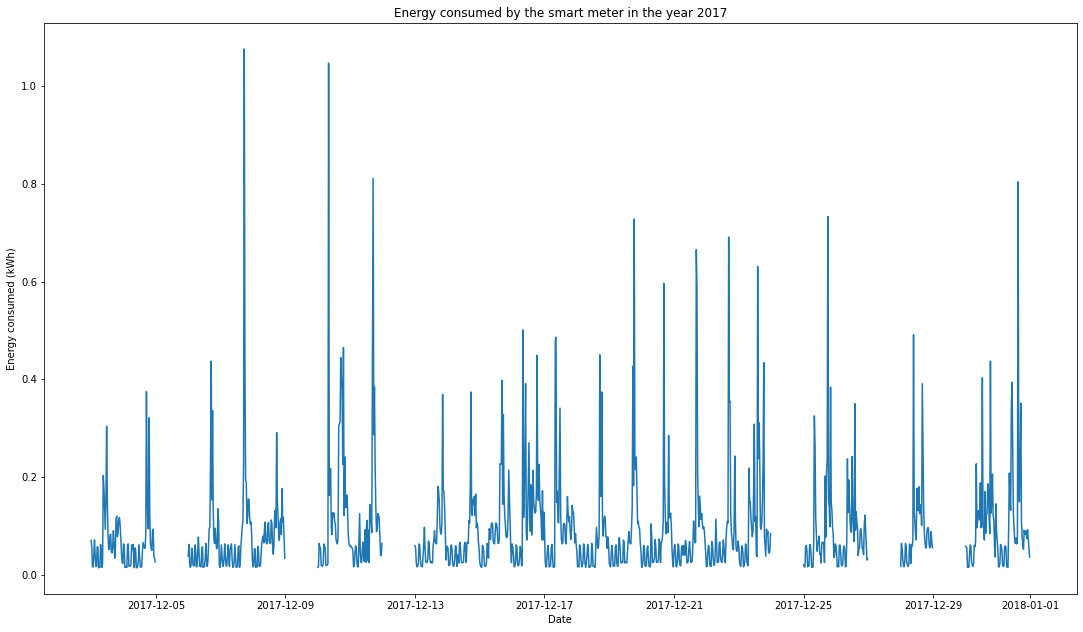

In [11]:
# Plotting a graph to depict energy consumption of the meter '0xa62b9f23553ff183f61e2bf943aab3d5983d02d7' in the year 2017

x = pd.to_datetime(consumption.columns)
y = consumption.loc['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7']
plt.plot(x, y, label='energy')
plt.xlabel('Date')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumed by the smart meter in the year 2017')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Inference: The energy consumption by the household is not even throughout the year.

#### Plot 2: Energy Consumed in kWh for all meters on 2017-01-01 in between the intervals 00:30:00 and 01:00:00 

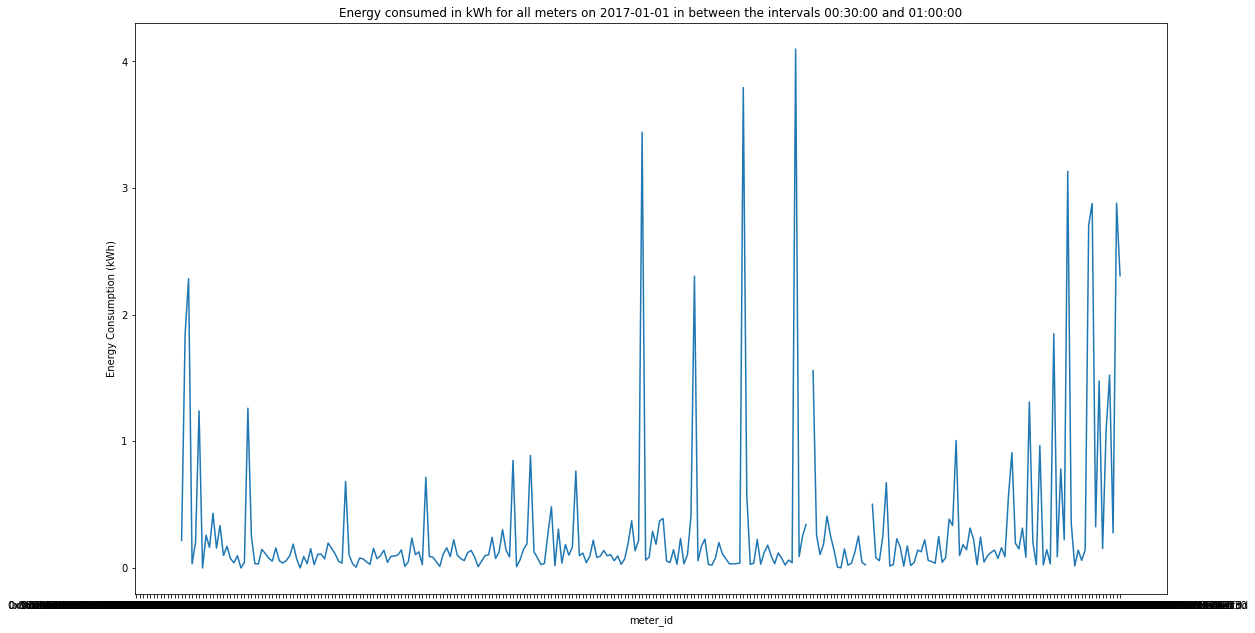

In [14]:
# Plot for energy consumed in kWh for all meters on 2017-01-01 in between 00:30:00 and 01:00:00

plt.plot(consumption['2017-01-01 00:30:00'], label='Energy')
plt.xlabel('meter_id')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy consumed in kWh for all meters on 2017-01-01 in between the intervals 00:30:00 and 01:00:00')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Inference: The energy consumption in a household is independent of other households.

In [4]:
# Changing the format of column names from string to datetime

consumption.columns = pd.to_datetime(consumption.columns)
print(consumption.columns)

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq=None)


In [17]:
# Reading Additional Info data 

addInfo = pd.read_csv("./data/addInfo.csv", index_col='meter_id')
addInfo.transpose()

meter_id                      0x02b7418b821b2edeeb2baa23ba1580566b4b0e43  \
dwelling_type                                        semi_detached_house   
num_occupants                                                        NaN   
num_bedrooms                                                           3   
heating_fuel                                                         NaN   
hot_water_fuel                                                       NaN   
boiler_age                                                           NaN   
loft_insulation                                                      NaN   
wall_insulation                                                      NaN   
heating_temperature                                                  NaN   
efficient_lighting_percentage                                        NaN   
dishwasher                                                           NaN   
freezer                                                              NaN   
fridge_freezer                                                       NaN   
refrigerator                                                         NaN   
tumble_dryer                                                         NaN   
washing_machine                                                      NaN   
game_console                                                         NaN   
laptop                                                               NaN   
pc                                                                   NaN   
router                                                               NaN   
set_top_box                                                          NaN   
tablet                                                               NaN   
tv                                                                   NaN   

meter_id                      0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41  \
dwelling_type                                             terraced_house   
num_occupants                                                        NaN   
num_bedrooms                                                           2   
heating_fuel                                                         NaN   
hot_water_fuel                                                       NaN   
boiler_age                                                           NaN   
loft_insulation                                                      NaN   
wall_insulation                                                      NaN   
heating_temperature                                                  NaN   
efficient_lighting_percentage                                        NaN   
dishwasher                                                           NaN   
freezer                                                              NaN   
fridge_freezer                                                       NaN   
refrigerator                                                         NaN   
tumble_dryer                                                         NaN   
washing_machine                                                      NaN   
game_console                                                         NaN   
laptop                                                               NaN   
pc                                                                   NaN   
router                                                               NaN   
set_top_box                                                          NaN   
tablet                                                               NaN   
tv                                                                   NaN   

meter_id                      0xdd45ab28a7a40eadc04607d6da42e5ad923b1339  \
dwelling_type                                        semi_detached_house   
num_occupants                                                        NaN   
num_bedrooms                                                         NaN   
heating_fuel                                  

In [18]:
# Categorical data

print("Number of dwelling types =", addInfo['dwelling_type'].nunique())
print("Number of occupants types =", addInfo['num_occupants'].nunique())
print("Number of bedrooms types =", addInfo['num_bedrooms'].nunique())
print("Number of heating fuel types =", addInfo['heating_fuel'].nunique())
print("Number of hot water fuel types =", addInfo['hot_water_fuel'].nunique())
print("Number of dishwasher types =", addInfo['dishwasher'].nunique())
print("Number of refrigerator types =", addInfo['refrigerator'].nunique())
print("Number of freezer types =", addInfo['freezer'].nunique())
print("Number of washing machine types =", addInfo['washing_machine'].nunique())

Number of dwelling types = 5
Number of occupants types = 4
Number of bedrooms types = 5
Number of heating fuel types = 4
Number of hot water fuel types = 3
Number of dishwasher types = 3
Number of refrigerator types = 3
Number of freezer types = 3
Number of washing machine types = 3


In [19]:
# Percentage of missing values in the Additional Info dataset 

(addInfo.isnull().sum().sum() / (addInfo.shape[0] * addInfo.shape[1])) * 100

89.65895027288036

In [20]:
# Reading Minimum Weather dataset 

weather_min = pd.read_csv("./data/weather-min.csv", index_col='meter_id')
weather_min.head()

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  1.7   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  1.7   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  2.7   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  2.7   
0x1a586297008785374c9de5073e7781d14d105bc8                  1.3   

                                            2017-01-02 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                 -1.0   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                 -1.0   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                 -0.2   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                 -1.7   
0x1a586297008785374c9de5073e7781d14d105bc8                 -0.1   

                                            2017-01-03 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                 -1.2   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                 -1.2   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                 -0.6   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                 -2.6   
0x1a586297008785374c9de5073e7781d14d105bc8                 -0.2   

                                            2017-01-04 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  0.3   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  0.3   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  0.4   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  1.4   
0x1a586297008785374c9de5073e7781d14d105bc8                  1.0   

                                            2017-01-05 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                 -2.4   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                 -2.4   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                 -1.3   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                 -3.2   
0x1a586297008785374c9de5073e7781d14d105bc8                 -1.5   

                                            2017-01-06 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                 -2.5   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                 -2.5   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                 -2.0   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                 -3.1   
0x1a586297008785374c9de5073e7781d14d105bc8                 -0.7   

                                            2017-01-07 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  5.7   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  5.7   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  5.6   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  4.9   
0x1a586297008785374c9de5073e7781d14d105bc8                  5.0   

                                            2017-01-08 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  7.2   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  7.2   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  7.1   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  6.2   
0x1a586297008785374c9de5073e7781d14d105bc8                  6.6   

                                            2017-01-09 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  2.9   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  2.9   
0x99c6ba65bec5c1

In [21]:
# Reading Maximum Weather dataset

weather_max = pd.read_csv("./data/weather-max.csv", index_col='meter_id')
weather_max.head()

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  7.0   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  7.0   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  7.4   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  7.3   
0x1a586297008785374c9de5073e7781d14d105bc8                  7.3   

                                            2017-01-02 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  3.8   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  3.8   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  4.1   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  4.0   
0x1a586297008785374c9de5073e7781d14d105bc8                  3.8   

                                            2017-01-03 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  5.1   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  5.1   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  5.7   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  5.6   
0x1a586297008785374c9de5073e7781d14d105bc8                  5.9   

                                            2017-01-04 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  6.9   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  6.9   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  6.4   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  6.4   
0x1a586297008785374c9de5073e7781d14d105bc8                  6.6   

                                            2017-01-05 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  4.7   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  4.7   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  5.6   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  5.7   
0x1a586297008785374c9de5073e7781d14d105bc8                  4.7   

                                            2017-01-06 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  5.4   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  5.4   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  5.2   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  4.6   
0x1a586297008785374c9de5073e7781d14d105bc8                  4.8   

                                            2017-01-07 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  9.7   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  9.7   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  9.0   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  8.5   
0x1a586297008785374c9de5073e7781d14d105bc8                  8.0   

                                            2017-01-08 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                 11.1   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                 11.1   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406                 10.3   
0x8f04b8efaa48f13810f51e4b361961226d718ef1                  8.7   
0x1a586297008785374c9de5073e7781d14d105bc8                  9.2   

                                            2017-01-09 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  8.8   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  8.8   
0x99c6ba65bec5c1

In [22]:
# Reading Average Weather dataset

weather_avg = pd.read_csv("./data/weather-avg.csv", index_col='meter_id')
weather_avg.head()

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             4.904167   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             4.904167   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             5.391667   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             5.250000   
0x1a586297008785374c9de5073e7781d14d105bc8             5.370833   

                                            2017-01-02 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             1.275000   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             1.275000   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             1.550000   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             1.237500   
0x1a586297008785374c9de5073e7781d14d105bc8             1.529167   

                                            2017-01-03 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             2.225000   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             2.225000   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             2.883333   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             2.287500   
0x1a586297008785374c9de5073e7781d14d105bc8             3.045833   

                                            2017-01-04 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             4.266667   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             4.266667   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             4.691667   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             4.612500   
0x1a586297008785374c9de5073e7781d14d105bc8             4.341667   

                                            2017-01-05 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             0.262500   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             0.262500   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             0.729167   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             0.954167   
0x1a586297008785374c9de5073e7781d14d105bc8             0.670833   

                                            2017-01-06 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             1.570833   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             1.570833   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             1.566667   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             1.791667   
0x1a586297008785374c9de5073e7781d14d105bc8             1.812500   

                                            2017-01-07 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             7.833333   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             7.833333   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             7.650000   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             6.745833   
0x1a586297008785374c9de5073e7781d14d105bc8             6.745833   

                                            2017-01-08 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             8.391667   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             8.391667   
0x99c6ba65bec5c1e83f8c19f6518178c87732c406             8.295833   
0x8f04b8efaa48f13810f51e4b361961226d718ef1             7.358333   
0x1a586297008785374c9de5073e7781d14d105bc8             7.691667   

                                            2017-01-09 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7             6.904167   
0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20             6.904167   
0x99c6ba65bec5c1

#### Plot 3: Minimum, Average, and Maximum temperature of a meter everyday in the year 2017

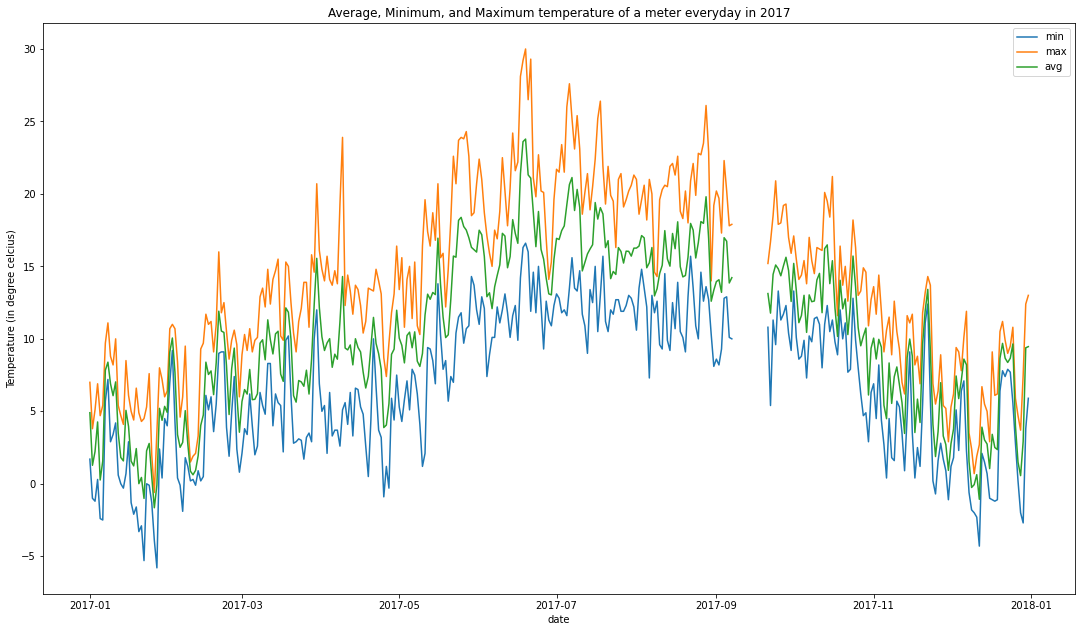

In [25]:
# Plotting a graph to show average, minimum and maximum temperature of meter '0xa62b9f23553ff183f61e2bf943aab3d5983d02d7' in 2017

x = pd.to_datetime(weather_avg.columns)
y1 = weather_min.loc['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7']
y2 = weather_max.loc['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7']
y3 = weather_avg.loc['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7']
plt.plot(x, y1, label = 'min')
plt.plot(x, y2, label = 'max')
plt.plot(x, y3, label = 'avg')
plt.xlabel('date')
plt.ylabel('Temperature (in degree celcius)')
plt.title('Average, Minimum, and Maximum temperature of a meter everyday in 2017')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Inference: The Temperature varies throughout the year.

# ITERATION 1

# Data Preprocessing

In [6]:
# Transform the consumption dataset for further operations

consumption = consumption.transpose()

# display consumption
consumption 

meter_id             0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01 00:00:00                                         NaN   
2017-01-01 00:30:00                                         NaN   
2017-01-01 01:00:00                                         NaN   
2017-01-01 01:30:00                                         NaN   
2017-01-01 02:00:00                                         NaN   
...                                                         ...   
2017-12-31 21:30:00                                       0.074   
2017-12-31 22:00:00                                       0.092   
2017-12-31 22:30:00                                       0.076   
2017-12-31 23:00:00                                       0.055   
2017-12-31 23:30:00                                       0.036   

meter_id             0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01 00:00:00                                         NaN   
2017-01-01 00:30:00                                         NaN   
2017-01-01 01:00:00                                         NaN   
2017-01-01 01:30:00                                         NaN   
2017-01-01 02:00:00                                         NaN   
...                                                         ...   
2017-12-31 21:30:00                                       0.394   
2017-12-31 22:00:00                                       0.073   
2017-12-31 22:30:00                                       0.077   
2017-12-31 23:00:00                                       0.049   
2017-12-31 23:30:00                                       0.048   

meter_id             0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01 00:00:00                                         NaN   
2017-01-01 00:30:00                                         NaN   
2017-01-01 01:00:00                                         NaN   
2017-01-01 01:30:00                                         NaN   
2017-01-01 02:00:00                                         NaN   
...                                                         ...   
2017-12-31 21:30:00                                       0.027   
2017-12-31 22:00:00                                       0.001   
2017-12-31 22:30:00                                       0.044   
2017-12-31 23:00:00                                       0.004   
2017-12-31 23:30:00                                       0.035   

meter_id             0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01 00:00:00                                         NaN   
2017-01-01 00:30:00                                         NaN   
2017-01-01 01:00:00                                         NaN   
2017-01-01 01:30:00                                         NaN   
2017-01-01 02:00:00                                         NaN   
...                                                         ...   
2017-12-31 21:30:00                                       0.057   
2017-12-31 22:00:00                                       0.018   
2017-12-31 22:30:00                                       0.038   
2017-12-31 23:00:00                                       0.040   
2017-12-31 23:30:00                                       0.014   

meter_id             0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01 00:00:00                                         NaN   
2017-01-01 00:30:00                                         NaN   
2017-01-01 01:00:00                                         NaN   
2017-01-01 01:30:00                                         NaN   
2017-01-01 02:00:00                                         NaN   
...                                                         ...   
2017-12-31 21:30:00                                       0.014   
2017-12-31 22:00:00                                       0.028   
2017-12-31 22:30:00                                       0.006   
2017-12-31 23:00:00                                       0.024   
2017-12-31 23:30:00                        

In [27]:
# Total number of missing values in consumption dataset

consumption.isnull().sum().sum()

29378388

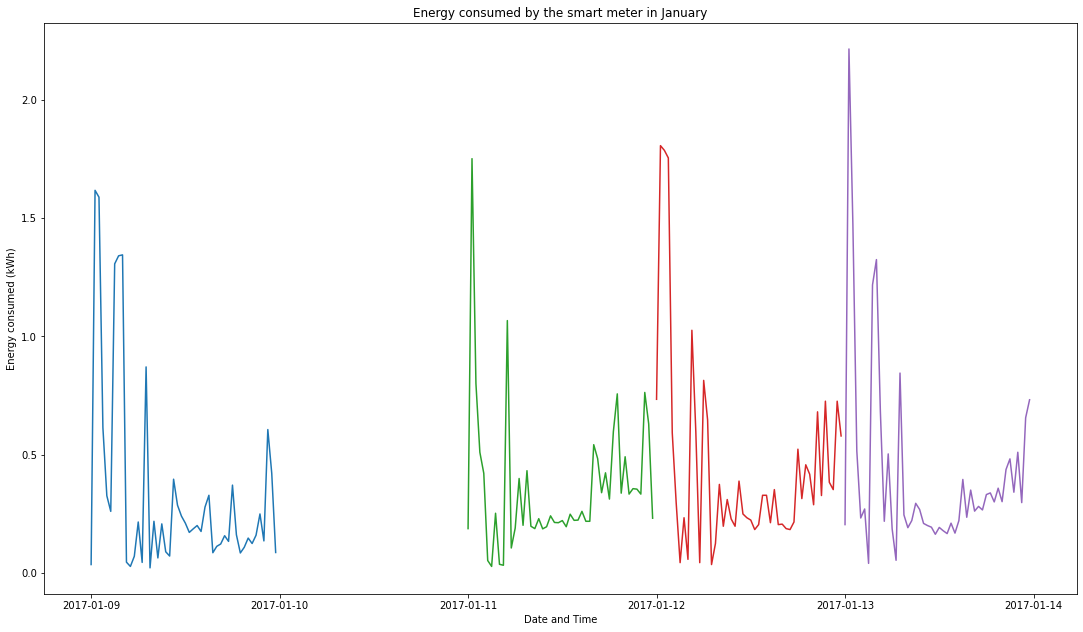

In [28]:
# Plotting energy consumption graph for meter id = '0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'

plt.plot(consumption.loc['2017-01-09']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-10']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-11']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-12']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-13']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.xlabel('Date and Time')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumed by the smart meter in January')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [62]:
# Fill the missing values by Linear Interpolation

df_linear = (consumption.transpose()).interpolate(method='linear', axis=1, inplace=False)
df_linear

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

                                            2017-01-01 00:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                1.089   
0xfdaf9f857621ec06f2cf801f42a020a322835090                1.523   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.276   
0x47218b46abb2fcaade487a211911406dc6e13730                2.881   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                2.307   

                                            2017-01-01 01:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.014   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.105   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.097   
0x47218b46abb2fcaade487a211911406dc6e13730                1.765   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                1.403   

                                            2017-01-01 01:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.204   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.296   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.058   
0x47218b46abb2fcaade487a211911406dc6e13730                1.391   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                1.471   

                                            2017-01-01 02:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44

In [63]:
df_linear.isnull().sum().sum()

26024308

In [64]:
df_linear = df_linear.transpose()

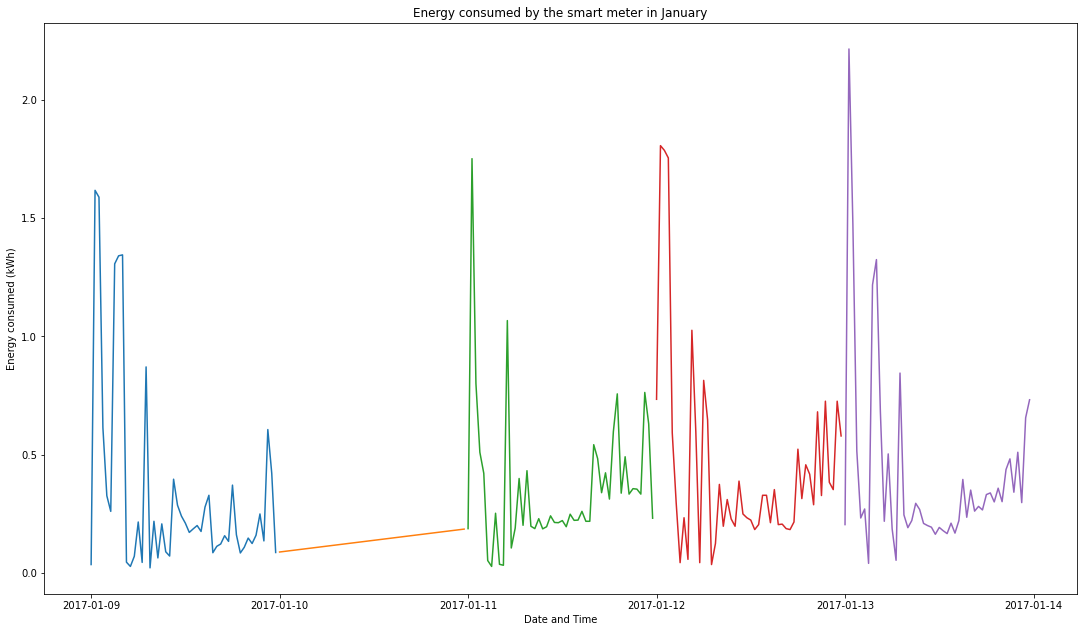

In [33]:
# Plotting energy consumption graph for meter id = '0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'

plt.plot(df_linear.loc['2017-01-09']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(df_linear.loc['2017-01-10']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(df_linear.loc['2017-01-11']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(df_linear.loc['2017-01-12']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(df_linear.loc['2017-01-13']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.xlabel('Date and Time')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumed by the smart meter in January')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [65]:
# Count of remaining missing values 

df_linear.isnull().sum().sum()

26024308

In [66]:
# Obtaining energy consumption for daily intervals

df_linear = df_linear.resample('D').sum()
df_linear

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       1.176   
2017-12-28                                       4.503   
2017-12-29                                       2.712   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       4.056   
2017-12-28                                      24.618   
2017-12-29                                       3.264   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       1.320   
2017-12-28                                      17.705   
2017-12-29                                       1.632   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       4.920   
2017-12-28                                      23.993   
2017-12-29                                       1.584   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      30.936   
2017-12-28                                      25.871   
2017-12-29                                      24.984   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       0.888   
2017-12-28                                      17.

In [67]:
# Retaining the NaN values lost by resampling

df_linear = df_linear.replace(0, np.nan)
df_linear

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       1.176   
2017-12-28                                       4.503   
2017-12-29                                       2.712   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       4.056   
2017-12-28                                      24.618   
2017-12-29                                       3.264   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       1.320   
2017-12-28                                      17.705   
2017-12-29                                       1.632   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       4.920   
2017-12-28                                      23.993   
2017-12-29                                       1.584   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      30.936   
2017-12-28                                      25.871   
2017-12-29                                      24.984   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       0.888   
2017-12-28                                      17.

In [68]:
# Fill the remaining missing values by global mean

df_linear = df_linear.fillna(df_linear.mean())
df_linear

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                    3.915103   
2017-01-02                                    3.915103   
2017-01-03                                    3.915103   
2017-01-04                                    3.915103   
2017-01-05                                    3.915103   
...                                                ...   
2017-12-27                                    1.176000   
2017-12-28                                    4.503000   
2017-12-29                                    2.712000   
2017-12-30                                    5.129000   
2017-12-31                                    5.395000   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                   15.834862   
2017-01-02                                   15.834862   
2017-01-03                                   15.834862   
2017-01-04                                   15.834862   
2017-01-05                                   15.834862   
...                                                ...   
2017-12-27                                    4.056000   
2017-12-28                                   24.618000   
2017-12-29                                    3.264000   
2017-12-30                                   15.167000   
2017-12-31                                   11.751000   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                    10.11831   
2017-01-02                                    10.11831   
2017-01-03                                    10.11831   
2017-01-04                                    10.11831   
2017-01-05                                    10.11831   
...                                                ...   
2017-12-27                                     1.32000   
2017-12-28                                    17.70500   
2017-12-29                                     1.63200   
2017-12-30                                     8.96600   
2017-12-31                                     4.63300   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                   15.185414   
2017-01-02                                   15.185414   
2017-01-03                                   15.185414   
2017-01-04                                   15.185414   
2017-01-05                                   15.185414   
...                                                ...   
2017-12-27                                    4.920000   
2017-12-28                                   23.993000   
2017-12-29                                    1.584000   
2017-12-30                                   15.841000   
2017-12-31                                   14.452000   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                   30.447138   
2017-01-02                                   30.447138   
2017-01-03                                   30.447138   
2017-01-04                                   30.447138   
2017-01-05                                   30.447138   
...                                                ...   
2017-12-27                                   30.936000   
2017-12-28                                   25.871000   
2017-12-29                                   24.984000   
2017-12-30                                   46.274000   
2017-12-31                                   16.901000   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                   15.856724   
2017-01-02                                   15.856724   
2017-01-03                                   15.856724   
2017-01-04                                   15.856724   
2017-01-05                                   15.856724   
...                                                ...   
2017-12-27                                    0.888000   
2017-12-28                                   17.173

In [69]:
df_linear = df_linear.transpose()
df_linear

2017-01-01  2017-01-02  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    3.915103    3.915103   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   15.834862   15.834862   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   10.118310   10.118310   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407   15.185414   15.185414   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f   30.447138   30.447138   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    2.317000    2.301000   
0xfdaf9f857621ec06f2cf801f42a020a322835090   14.437000   16.274000   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    7.824000    7.517000   
0x47218b46abb2fcaade487a211911406dc6e13730   23.965000   28.689000   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd   11.302000   14.178000   

                                            2017-01-03  2017-01-04  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    3.915103    3.915103   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   15.834862   15.834862   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   10.118310   10.118310   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407   15.185414   15.185414   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f   30.447138   30.447138   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    2.352000    2.516000   
0xfdaf9f857621ec06f2cf801f42a020a322835090    7.031000   17.018000   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    5.398000    6.788000   
0x47218b46abb2fcaade487a211911406dc6e13730   27.664000   29.229000   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd   15.499000   11.853000   

                                            2017-01-05  2017-01-06  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    3.915103    3.915103   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   15.834862   15.834862   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   10.118310   10.118310   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407   15.185414   15.185414   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f   30.447138   30.447138   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    2.229000    2.354000   
0xfdaf9f857621ec06f2cf801f42a020a322835090   17.603000   15.005000   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    7.360000    6.898000   
0x47218b46abb2fcaade487a211911406dc6e13730   29.548000   27.909000   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd   17.431000   14.506000   

                                            2017-01-07  2017-01-08  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    3.915103    3.915103   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   15.834862   15.834862   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   10.118310   10.118310   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407   15.185414   15.185414   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f   30.447138   30.447138   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    2.397000    2.397000   
0xfdaf9f857621ec06f2cf801f42a020a322835090    8.987000    8.490000   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    7.321000    8.042000   
0x47218b46abb2fcaade487a211911406dc6e13730   26.923000   21.277000   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd   12.812000   10.472000   

                                            2017-01-09  2017-01-10  ...  \
meter_id                                                            ...   
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    3.915103    3.915103  ...   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da   15.834862   15.834862  ...   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f   10.118310   10.118310  ...   
0x5b76d3c0e0aefc6e0a8d1d0

In [71]:
# Transfer the preprocessed data to a CSV file.

df_linear.to_csv('data/df_linear_prepped.csv')

# Model Building

## 1 Auto-Regression Model

In [25]:
#Importing dataset
data = pd.read_csv("data/df_linear_prepped.csv", index_col='meter_id')

#Change the columns to datetime type
data.columns = pd.to_datetime(data.columns)

data = data.transpose()

#display data
data

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                    3.915103   
2017-01-02                                    3.915103   
2017-01-03                                    3.915103   
2017-01-04                                    3.915103   
2017-01-05                                    3.915103   
...                                                ...   
2017-12-27                                    1.176000   
2017-12-28                                    4.503000   
2017-12-29                                    2.712000   
2017-12-30                                    5.129000   
2017-12-31                                    5.395000   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                   15.834862   
2017-01-02                                   15.834862   
2017-01-03                                   15.834862   
2017-01-04                                   15.834862   
2017-01-05                                   15.834862   
...                                                ...   
2017-12-27                                    4.056000   
2017-12-28                                   24.618000   
2017-12-29                                    3.264000   
2017-12-30                                   15.167000   
2017-12-31                                   11.751000   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                    10.11831   
2017-01-02                                    10.11831   
2017-01-03                                    10.11831   
2017-01-04                                    10.11831   
2017-01-05                                    10.11831   
...                                                ...   
2017-12-27                                     1.32000   
2017-12-28                                    17.70500   
2017-12-29                                     1.63200   
2017-12-30                                     8.96600   
2017-12-31                                     4.63300   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                   15.185414   
2017-01-02                                   15.185414   
2017-01-03                                   15.185414   
2017-01-04                                   15.185414   
2017-01-05                                   15.185414   
...                                                ...   
2017-12-27                                    4.920000   
2017-12-28                                   23.993000   
2017-12-29                                    1.584000   
2017-12-30                                   15.841000   
2017-12-31                                   14.452000   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                   30.447138   
2017-01-02                                   30.447138   
2017-01-03                                   30.447138   
2017-01-04                                   30.447138   
2017-01-05                                   30.447138   
...                                                ...   
2017-12-27                                   30.936000   
2017-12-28                                   25.871000   
2017-12-29                                   24.984000   
2017-12-30                                   46.274000   
2017-12-31                                   16.901000   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                   15.856724   
2017-01-02                                   15.856724   
2017-01-03                                   15.856724   
2017-01-04                                   15.856724   
2017-01-05                                   15.856724   
...                                                ...   
2017-12-27                                    0.888000   
2017-12-28                                   17.173

In [26]:
# Check for missing values

data.isnull().sum().sum()

0

In [27]:
# Obtain monthly energy consumption

data = data.resample('M').sum()
data

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-31                                  121.368207   
2017-02-28                                  109.622897   
2017-03-31                                  121.368207   
2017-04-30                                  117.453103   
2017-05-31                                  121.368207   
2017-06-30                                  117.453103   
2017-07-31                                  121.368207   
2017-08-31                                  121.368207   
2017-09-30                                  117.453103   
2017-10-31                                  121.368207   
2017-11-30                                  117.453103   
2017-12-31                                  121.368207   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-31                                  490.880724   
2017-02-28                                  443.376138   
2017-03-31                                  490.880724   
2017-04-30                                  475.045862   
2017-05-31                                  490.880724   
2017-06-30                                  475.045862   
2017-07-31                                  490.880724   
2017-08-31                                  490.880724   
2017-09-30                                  475.045862   
2017-10-31                                  490.880724   
2017-11-30                                  475.045862   
2017-12-31                                  490.880724   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-31                                  313.667621   
2017-02-28                                  283.312690   
2017-03-31                                  313.667621   
2017-04-30                                  303.549310   
2017-05-31                                  313.667621   
2017-06-30                                  303.549310   
2017-07-31                                  313.667621   
2017-08-31                                  313.667621   
2017-09-30                                  303.549310   
2017-10-31                                  313.667621   
2017-11-30                                  303.549310   
2017-12-31                                  313.667621   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-31                                  470.747828   
2017-02-28                                  425.191586   
2017-03-31                                  470.747828   
2017-04-30                                  455.562414   
2017-05-31                                  470.747828   
2017-06-30                                  455.562414   
2017-07-31                                  470.747828   
2017-08-31                                  470.747828   
2017-09-30                                  455.562414   
2017-10-31                                  470.747828   
2017-11-30                                  455.562414   
2017-12-31                                  470.747828   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-31                                  943.861276   
2017-02-28                                  852.519862   
2017-03-31                                  943.861276   
2017-04-30                                  913.414138   
2017-05-31                                  943.861276   
2017-06-30                                  913.414138   
2017-07-31                                  943.861276   
2017-08-31                                  943.861276   
2017-09-30                                  913.414138   
2017-10-31                                  943.861276   
2017-11-30                                  913.414138   
2017-12-31                                  943.861276   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-31                                  491.558448   
2017-02-28                                  443.988276   
2017-03-31                                  491.558

In [28]:
# Splitting the data for train and test set 

train, test = data[0:10], data[10:]
print(train.shape)
print(test.shape)

(10, 3248)
(2, 3248)


In [82]:
# Initialize a dataframe for storing the prediction values

prediction = pd.DataFrame()
prediction

Empty DataFrame
Columns: []
Index: []

In [71]:
# Importing required libraries 

import pmdarima as pm
from statsmodels.tsa.ar_model import AutoReg

In [83]:
# Model Fitting and Prediction for every meter

count = 0
for column in train:
    count += 1
    model = AutoReg(train[column], lags = 1).fit()
    start = len(train)
    end = len(train) +len(test) - 1
    forecast = model.predict(start,  end +12)
    prediction[column] = forecast
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079


In [84]:
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-11-30                                  117.453103   
2017-12-31                                  119.410655   
2018-01-31                                  118.431879   
2018-02-28                                  118.921267   
2018-03-31                                  118.676573   
2018-04-30                                  118.798920   
2018-05-31                                  118.737747   
2018-06-30                                  118.768334   
2018-07-31                                  118.753040   
2018-08-31                                  118.760687   
2018-09-30                                  118.756863   
2018-10-31                                  118.758775   
2018-11-30                                  118.757819   
2018-12-31                                  118.758297   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-11-30                                  475.045862   
2017-12-31                                  482.963293   
2018-01-31                                  479.004578   
2018-02-28                                  480.983935   
2018-03-31                                  479.994256   
2018-04-30                                  480.489096   
2018-05-31                                  480.241676   
2018-06-30                                  480.365386   
2018-07-31                                  480.303531   
2018-08-31                                  480.334459   
2018-09-30                                  480.318995   
2018-10-31                                  480.326727   
2018-11-30                                  480.322861   
2018-12-31                                  480.324794   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-11-30                                  303.549310   
2017-12-31                                  308.608466   
2018-01-31                                  306.078888   
2018-02-28                                  307.343677   
2018-03-31                                  306.711282   
2018-04-30                                  307.027480   
2018-05-31                                  306.869381   
2018-06-30                                  306.948430   
2018-07-31                                  306.908906   
2018-08-31                                  306.928668   
2018-09-30                                  306.918787   
2018-10-31                                  306.923727   
2018-11-30                                  306.921257   
2018-12-31                                  306.922492   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-11-30                                  455.562414   
2017-12-31                                  463.155121   
2018-01-31                                  459.358767   
2018-02-28                                  461.256944   
2018-03-31                                  460.307856   
2018-04-30                                  460.782400   
2018-05-31                                  460.545128   
2018-06-30                                  460.663764   
2018-07-31                                  460.604446   
2018-08-31                                  460.634105   
2018-09-30                                  460.619275   
2018-10-31                                  460.626690   
2018-11-30                                  460.622983   
2018-12-31                                  460.624836   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-11-30                                  913.414138   
2017-12-31                                  928.637707   
2018-01-31                                  921.025922   
2018-02-28                                  924.831815   
2018-03-31                                  922.928869   
2018-04-30                                  923.880342   
2018-05-31                                  923.404605   
2018-06-30                                  923.642473   
2018-0

In [85]:
# Dropping the history from prediction dataframe

prediction.drop(prediction.index[:2], inplace=True)
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2018-01-31                                  118.431879   
2018-02-28                                  118.921267   
2018-03-31                                  118.676573   
2018-04-30                                  118.798920   
2018-05-31                                  118.737747   
2018-06-30                                  118.768334   
2018-07-31                                  118.753040   
2018-08-31                                  118.760687   
2018-09-30                                  118.756863   
2018-10-31                                  118.758775   
2018-11-30                                  118.757819   
2018-12-31                                  118.758297   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2018-01-31                                  479.004578   
2018-02-28                                  480.983935   
2018-03-31                                  479.994256   
2018-04-30                                  480.489096   
2018-05-31                                  480.241676   
2018-06-30                                  480.365386   
2018-07-31                                  480.303531   
2018-08-31                                  480.334459   
2018-09-30                                  480.318995   
2018-10-31                                  480.326727   
2018-11-30                                  480.322861   
2018-12-31                                  480.324794   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2018-01-31                                  306.078888   
2018-02-28                                  307.343677   
2018-03-31                                  306.711282   
2018-04-30                                  307.027480   
2018-05-31                                  306.869381   
2018-06-30                                  306.948430   
2018-07-31                                  306.908906   
2018-08-31                                  306.928668   
2018-09-30                                  306.918787   
2018-10-31                                  306.923727   
2018-11-30                                  306.921257   
2018-12-31                                  306.922492   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2018-01-31                                  459.358767   
2018-02-28                                  461.256944   
2018-03-31                                  460.307856   
2018-04-30                                  460.782400   
2018-05-31                                  460.545128   
2018-06-30                                  460.663764   
2018-07-31                                  460.604446   
2018-08-31                                  460.634105   
2018-09-30                                  460.619275   
2018-10-31                                  460.626690   
2018-11-30                                  460.622983   
2018-12-31                                  460.624836   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2018-01-31                                  921.025922   
2018-02-28                                  924.831815   
2018-03-31                                  922.928869   
2018-04-30                                  923.880342   
2018-05-31                                  923.404605   
2018-06-30                                  923.642473   
2018-07-31                                  923.523539   
2018-08-31                                  923.583006   
2018-09-30                                  923.553273   
2018-10-31                                  923.568139   
2018-11-30                                  923.560706   
2018-12-31                                  923.564423   

            0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2018-01-31                                  479.665905   
2018-02-28                                  481.647996   
2018-03-31                                  480.656950   
2018-

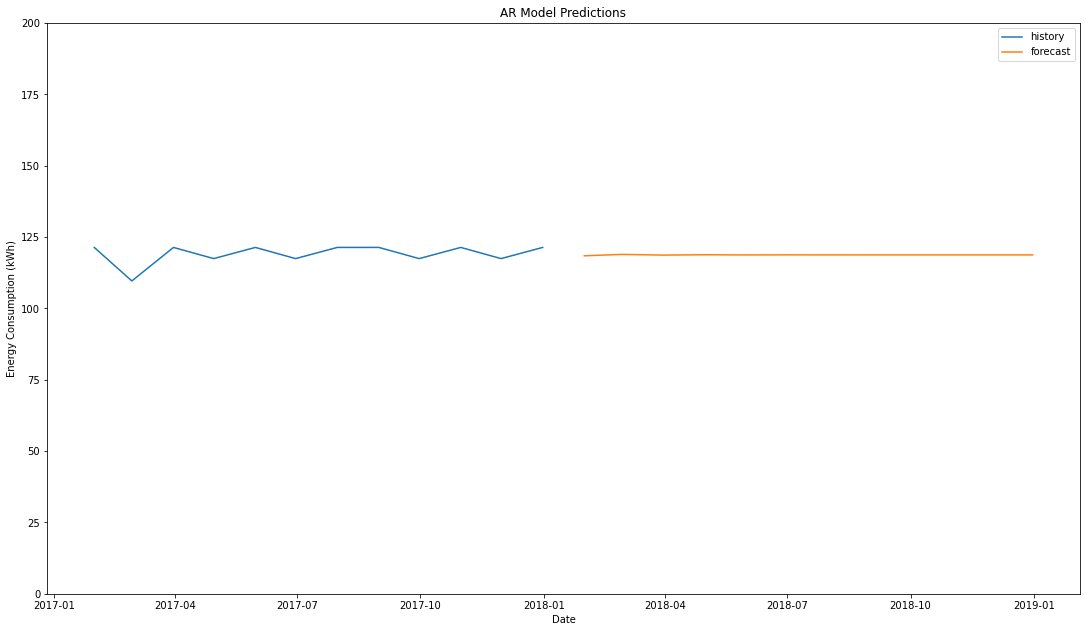

In [102]:
# AR Model Predictions for the meter id 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7

plt.plot(data['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7'], label='history')
plt.plot(prediction['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7'], label='forecast')
plt.ylim(0, 200)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('AR Model Predictions')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

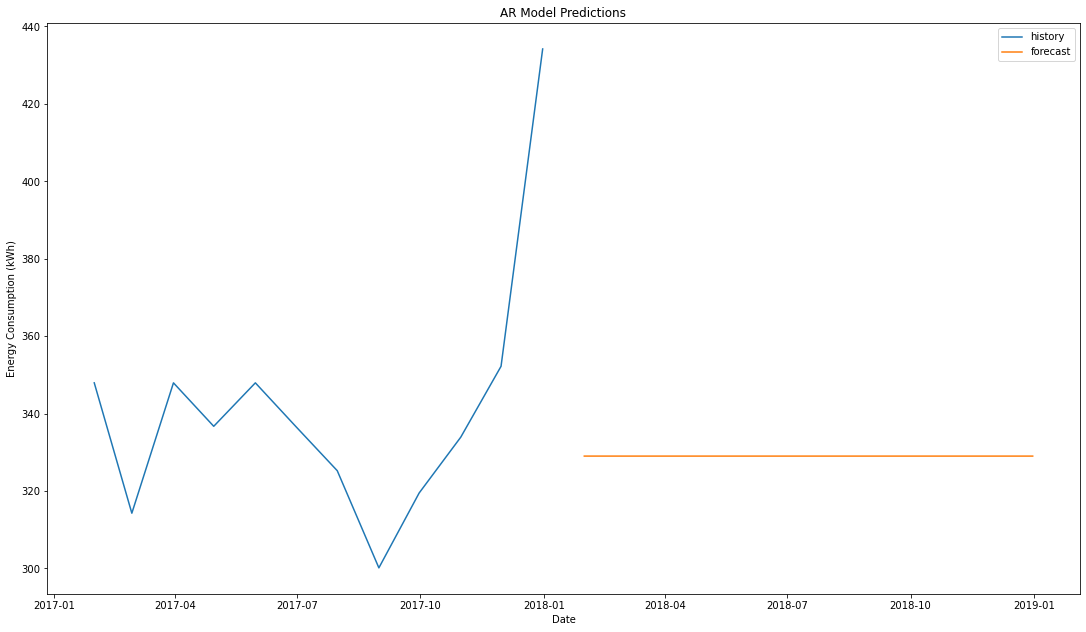

In [104]:
# AR Model Predictions for the meter id 0x93f617649b8e56f685131892d990dc7113585071

plt.plot(data['0x93f617649b8e56f685131892d990dc7113585071'], label='history')
plt.plot(prediction['0x93f617649b8e56f685131892d990dc7113585071'], label='forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('AR Model Predictions')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

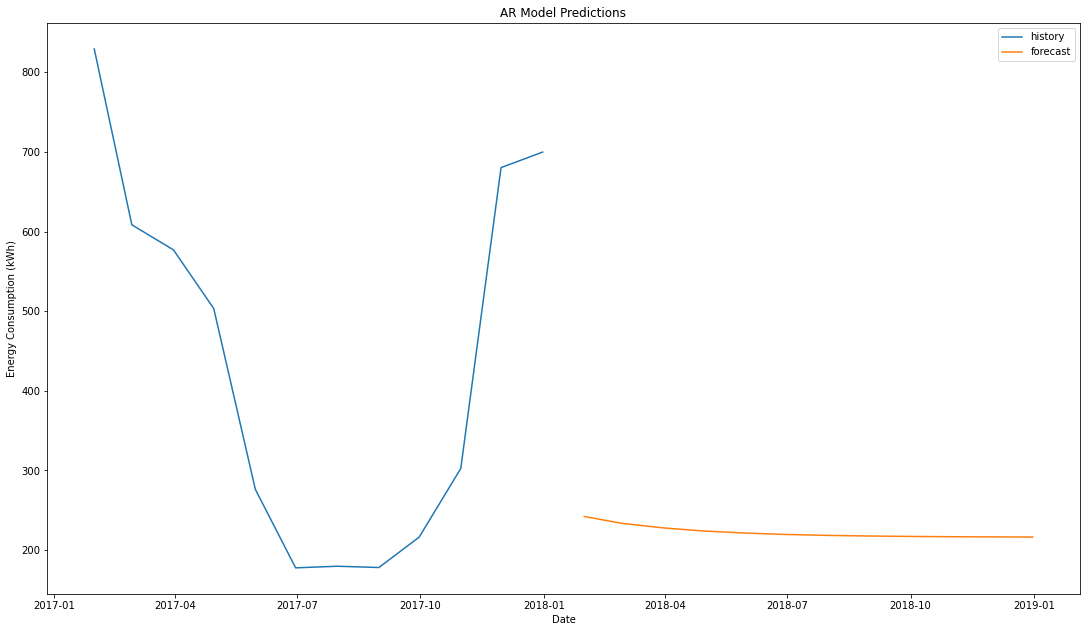

In [105]:
# AR Model Predictions for the meter id 0x47218b46abb2fcaade487a211911406dc6e13730

plt.plot(data['0x47218b46abb2fcaade487a211911406dc6e13730'], label='history')
plt.plot(prediction['0x47218b46abb2fcaade487a211911406dc6e13730'], label='forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('AR Model Predictions')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [99]:
prediction = prediction.transpose()
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2018-01-31                                  118.431879   
2018-02-28                                  118.921267   
2018-03-31                                  118.676573   
2018-04-30                                  118.798920   
2018-05-31                                  118.737747   
2018-06-30                                  118.768334   
2018-07-31                                  118.753040   
2018-08-31                                  118.760687   
2018-09-30                                  118.756863   
2018-10-31                                  118.758775   
2018-11-30                                  118.757819   
2018-12-31                                  118.758297   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2018-01-31                                  479.004578   
2018-02-28                                  480.983935   
2018-03-31                                  479.994256   
2018-04-30                                  480.489096   
2018-05-31                                  480.241676   
2018-06-30                                  480.365386   
2018-07-31                                  480.303531   
2018-08-31                                  480.334459   
2018-09-30                                  480.318995   
2018-10-31                                  480.326727   
2018-11-30                                  480.322861   
2018-12-31                                  480.324794   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2018-01-31                                  306.078888   
2018-02-28                                  307.343677   
2018-03-31                                  306.711282   
2018-04-30                                  307.027480   
2018-05-31                                  306.869381   
2018-06-30                                  306.948430   
2018-07-31                                  306.908906   
2018-08-31                                  306.928668   
2018-09-30                                  306.918787   
2018-10-31                                  306.923727   
2018-11-30                                  306.921257   
2018-12-31                                  306.922492   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2018-01-31                                  459.358767   
2018-02-28                                  461.256944   
2018-03-31                                  460.307856   
2018-04-30                                  460.782400   
2018-05-31                                  460.545128   
2018-06-30                                  460.663764   
2018-07-31                                  460.604446   
2018-08-31                                  460.634105   
2018-09-30                                  460.619275   
2018-10-31                                  460.626690   
2018-11-30                                  460.622983   
2018-12-31                                  460.624836   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2018-01-31                                  921.025922   
2018-02-28                                  924.831815   
2018-03-31                                  922.928869   
2018-04-30                                  923.880342   
2018-05-31                                  923.404605   
2018-06-30                                  923.642473   
2018-07-31                                  923.523539   
2018-08-31                                  923.583006   
2018-09-30                                  923.553273   
2018-10-31                                  923.568139   
2018-11-30                                  923.560706   
2018-12-31                                  923.564423   

            0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2018-01-31                                  479.665905   
2018-02-28                                  481.647996   
2018-03-31                                  480.656950   
2018-

In [87]:
prediction.to_csv('dataAR_predictions.csv')

# ITERATION 2

# Data Preprocessing

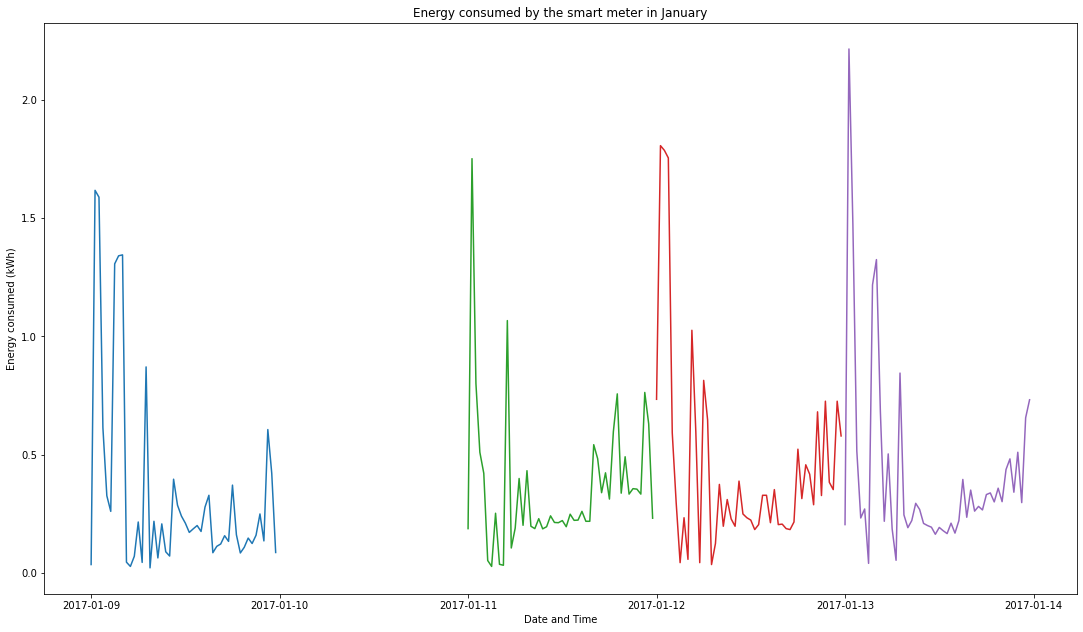

In [7]:
# Plotting energy consumption graph for meter id = '0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'

plt.plot(consumption.loc['2017-01-09']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-10']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-11']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-12']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-13']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.xlabel('Date and Time')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumed by the smart meter in January')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [34]:
# Fill the missing values by the value at the same interval on the day after
def fill_missing(values):
    one_day = 48
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                try:
                    values[row, col] = values[row + one_day, col]
                except: 
                    values[row, col] = values[row - one_day, col]

In [35]:
# Call the function
for i in range(5):
    fill_missing(consumption.values)

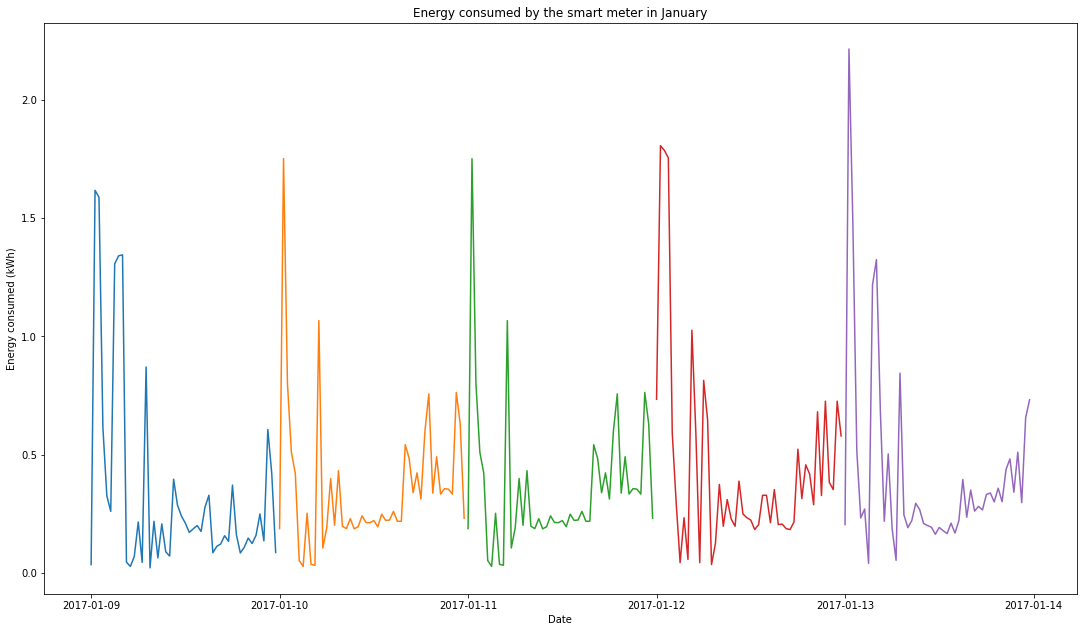

In [36]:
# Plotting energy consumption graph for meter id = 0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80 for the month of January 2017
plt.plot(consumption.loc['2017-01-09']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-10']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-11']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-12']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.plot(consumption.loc['2017-01-13']['0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80'], label='energy')
plt.xlabel('Date')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumed by the smart meter in January')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [37]:
# Remaining missing values after using fill_missing() method

consumption.isnull().sum().sum()

25350990

In [38]:
# Obtaining energy consumption for daily intervals

consumption = consumption.resample('D').sum()
consumption

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                       4.503   
2017-12-28                                       4.503   
2017-12-29                                       5.129   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      24.618   
2017-12-28                                      24.618   
2017-12-29                                      15.167   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      17.705   
2017-12-28                                      17.705   
2017-12-29                                       8.966   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      23.993   
2017-12-28                                      23.993   
2017-12-29                                      15.841   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      25.871   
2017-12-28                                      25.871   
2017-12-29                                      46.274   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                       0.000   
2017-01-02                                       0.000   
2017-01-03                                       0.000   
2017-01-04                                       0.000   
2017-01-05                                       0.000   
...                                                ...   
2017-12-27                                      17.173   
2017-12-28                                      17.

In [39]:
# Retaining the NaN values lost by resampling

consumption = consumption.replace(0, np.nan)
consumption

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                       4.503   
2017-12-28                                       4.503   
2017-12-29                                       5.129   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      24.618   
2017-12-28                                      24.618   
2017-12-29                                      15.167   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      17.705   
2017-12-28                                      17.705   
2017-12-29                                       8.966   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      23.993   
2017-12-28                                      23.993   
2017-12-29                                      15.841   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      25.871   
2017-12-28                                      25.871   
2017-12-29                                      46.274   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                         NaN   
2017-01-02                                         NaN   
2017-01-03                                         NaN   
2017-01-04                                         NaN   
2017-01-05                                         NaN   
...                                                ...   
2017-12-27                                      17.173   
2017-12-28                                      17.

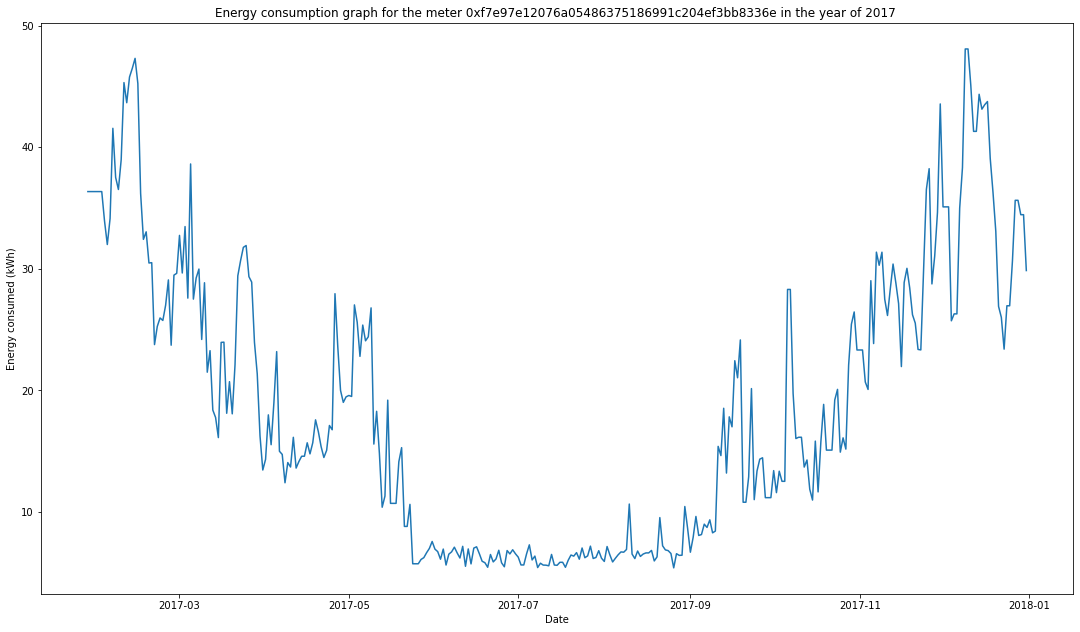

In [40]:
# Plotting the energy consumption graph for the meter '0xf7e97e12076a05486375186991c204ef3bb8336e' showing missing values

plt.plot(consumption['0xf7e97e12076a05486375186991c204ef3bb8336e'], label='energy')
plt.xlabel('Date')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumption graph for the meter 0xf7e97e12076a05486375186991c204ef3bb8336e in the year of 2017 ')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [41]:
# Backward fill for the remaining missing values in the dataset 

consumption = consumption.replace(np.nan, method='bfill')
consumption

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                       3.517   
2017-01-02                                       3.517   
2017-01-03                                       3.517   
2017-01-04                                       3.517   
2017-01-05                                       3.517   
...                                                ...   
2017-12-27                                       4.503   
2017-12-28                                       4.503   
2017-12-29                                       5.129   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                      18.057   
2017-01-02                                      18.057   
2017-01-03                                      18.057   
2017-01-04                                      18.057   
2017-01-05                                      18.057   
...                                                ...   
2017-12-27                                      24.618   
2017-12-28                                      24.618   
2017-12-29                                      15.167   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                      16.324   
2017-01-02                                      16.324   
2017-01-03                                      16.324   
2017-01-04                                      16.324   
2017-01-05                                      16.324   
...                                                ...   
2017-12-27                                      17.705   
2017-12-28                                      17.705   
2017-12-29                                       8.966   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                      14.012   
2017-01-02                                      14.012   
2017-01-03                                      14.012   
2017-01-04                                      14.012   
2017-01-05                                      14.012   
...                                                ...   
2017-12-27                                      23.993   
2017-12-28                                      23.993   
2017-12-29                                      15.841   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                      30.378   
2017-01-02                                      30.378   
2017-01-03                                      30.378   
2017-01-04                                      30.378   
2017-01-05                                      30.378   
...                                                ...   
2017-12-27                                      25.871   
2017-12-28                                      25.871   
2017-12-29                                      46.274   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                      20.607   
2017-01-02                                      20.607   
2017-01-03                                      20.607   
2017-01-04                                      20.607   
2017-01-05                                      20.607   
...                                                ...   
2017-12-27                                      17.173   
2017-12-28                                      17.

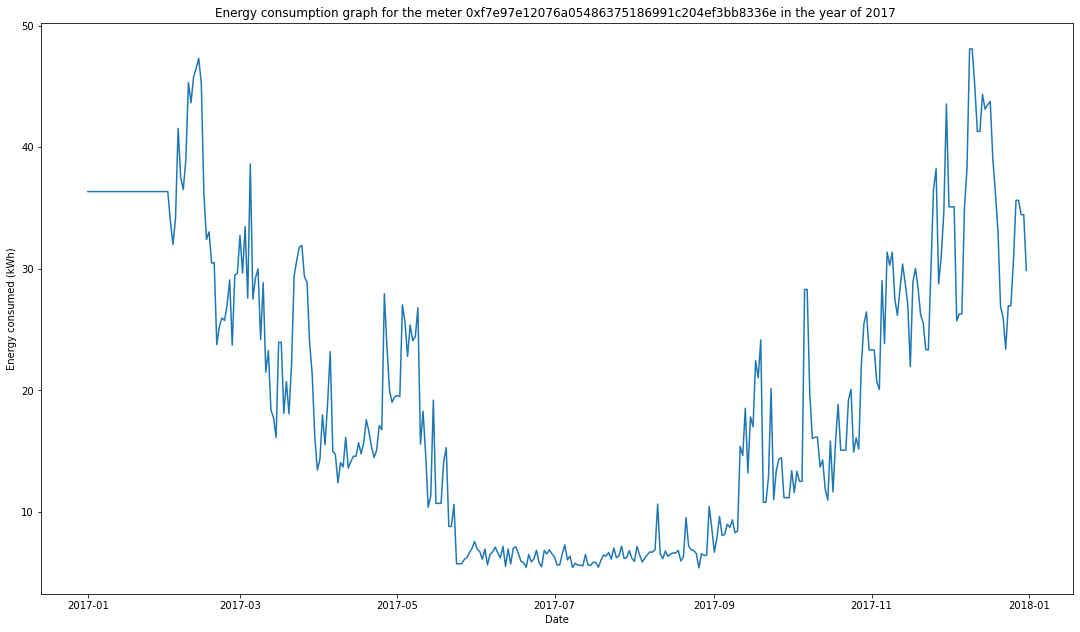

In [42]:
# Plotting the energy consumption graph for the meter '0xf7e97e12076a05486375186991c204ef3bb8336e' after backward filling

plt.plot(consumption['0xf7e97e12076a05486375186991c204ef3bb8336e'], label='energy')
plt.xlabel('Date')
plt.ylabel('Energy consumed (kWh)')
plt.title('Energy consumption graph for the meter 0xf7e97e12076a05486375186991c204ef3bb8336e in the year of 2017 ')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [43]:
# Count of missing values in the dataset after backward filling

consumption.isnull().sum().sum()

1072

In [47]:
# Fill the remaining missing values by global mean

consumption = consumption.fillna(consumption.mean())
consumption

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                       3.517   
2017-01-02                                       3.517   
2017-01-03                                       3.517   
2017-01-04                                       3.517   
2017-01-05                                       3.517   
...                                                ...   
2017-12-27                                       4.503   
2017-12-28                                       4.503   
2017-12-29                                       5.129   
2017-12-30                                       5.129   
2017-12-31                                       5.395   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                      18.057   
2017-01-02                                      18.057   
2017-01-03                                      18.057   
2017-01-04                                      18.057   
2017-01-05                                      18.057   
...                                                ...   
2017-12-27                                      24.618   
2017-12-28                                      24.618   
2017-12-29                                      15.167   
2017-12-30                                      15.167   
2017-12-31                                      11.751   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                      16.324   
2017-01-02                                      16.324   
2017-01-03                                      16.324   
2017-01-04                                      16.324   
2017-01-05                                      16.324   
...                                                ...   
2017-12-27                                      17.705   
2017-12-28                                      17.705   
2017-12-29                                       8.966   
2017-12-30                                       8.966   
2017-12-31                                       4.633   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                      14.012   
2017-01-02                                      14.012   
2017-01-03                                      14.012   
2017-01-04                                      14.012   
2017-01-05                                      14.012   
...                                                ...   
2017-12-27                                      23.993   
2017-12-28                                      23.993   
2017-12-29                                      15.841   
2017-12-30                                      15.841   
2017-12-31                                      14.452   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                      30.378   
2017-01-02                                      30.378   
2017-01-03                                      30.378   
2017-01-04                                      30.378   
2017-01-05                                      30.378   
...                                                ...   
2017-12-27                                      25.871   
2017-12-28                                      25.871   
2017-12-29                                      46.274   
2017-12-30                                      46.274   
2017-12-31                                      16.901   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                      20.607   
2017-01-02                                      20.607   
2017-01-03                                      20.607   
2017-01-04                                      20.607   
2017-01-05                                      20.607   
...                                                ...   
2017-12-27                                      17.173   
2017-12-28                                      17.

In [48]:
consumption = consumption.transpose()
consumption

2017-01-01  2017-01-02  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       3.517       3.517   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da      18.057      18.057   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f      16.324      16.324   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407      14.012      14.012   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f      30.378      30.378   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

                                            2017-01-03  2017-01-04  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       3.517       3.517   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da      18.057      18.057   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f      16.324      16.324   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407      14.012      14.012   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f      30.378      30.378   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.352       2.516   
0xfdaf9f857621ec06f2cf801f42a020a322835090       7.031      17.018   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       5.398       6.788   
0x47218b46abb2fcaade487a211911406dc6e13730      27.664      29.229   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      15.499      11.853   

                                            2017-01-05  2017-01-06  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       3.517       3.517   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da      18.057      18.057   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f      16.324      16.324   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407      14.012      14.012   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f      30.378      30.378   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.229       2.354   
0xfdaf9f857621ec06f2cf801f42a020a322835090      17.603      15.005   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.360       6.898   
0x47218b46abb2fcaade487a211911406dc6e13730      29.548      27.909   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      17.431      14.506   

                                            2017-01-07  2017-01-08  \
meter_id                                                             
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       3.517       3.517   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da      18.057      18.057   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f      16.324      16.324   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407      14.012      14.012   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f      30.378      30.378   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.397       2.397   
0xfdaf9f857621ec06f2cf801f42a020a322835090       8.987       8.490   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.321       8.042   
0x47218b46abb2fcaade487a211911406dc6e13730      26.923      21.277   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      12.812      10.472   

                                            2017-01-09  2017-01-10  ...  \
meter_id                                                            ...   
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       3.517       3.517  ...   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da      18.057      18.057  ...   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f      16.324      16.324  ...   
0x5b76d3c0e0aefc6e0a8d1d0

In [49]:
# Transfer the preprocessed data to a CSV file.

consumption.to_csv('data/consumption_prepped.csv')

# Model Building

## 1 ARIMA (Auto-Regression Integrated Moving Average) Model

In [37]:
# Importing dataset
consumption = pd.read_csv("data\consumption_prepped.csv", index_col='meter_id')

# Change the columns to datetime type
consumption.columns = pd.to_datetime(consumption.columns)

# Obtain transpose
consumption = consumption.transpose()

# display consumption
consumption

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                    3.915103   
2017-01-02                                    3.915103   
2017-01-03                                    3.915103   
2017-01-04                                    3.915103   
2017-01-05                                    3.915103   
...                                                ...   
2017-12-27                                    1.176000   
2017-12-28                                    4.503000   
2017-12-29                                    2.712000   
2017-12-30                                    5.129000   
2017-12-31                                    5.395000   

meter_id    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
2017-01-01                                   15.834862   
2017-01-02                                   15.834862   
2017-01-03                                   15.834862   
2017-01-04                                   15.834862   
2017-01-05                                   15.834862   
...                                                ...   
2017-12-27                                    4.056000   
2017-12-28                                   24.618000   
2017-12-29                                    3.264000   
2017-12-30                                   15.167000   
2017-12-31                                   11.751000   

meter_id    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
2017-01-01                                    10.11831   
2017-01-02                                    10.11831   
2017-01-03                                    10.11831   
2017-01-04                                    10.11831   
2017-01-05                                    10.11831   
...                                                ...   
2017-12-27                                     1.32000   
2017-12-28                                    17.70500   
2017-12-29                                     1.63200   
2017-12-30                                     8.96600   
2017-12-31                                     4.63300   

meter_id    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
2017-01-01                                   15.185414   
2017-01-02                                   15.185414   
2017-01-03                                   15.185414   
2017-01-04                                   15.185414   
2017-01-05                                   15.185414   
...                                                ...   
2017-12-27                                    4.920000   
2017-12-28                                   23.993000   
2017-12-29                                    1.584000   
2017-12-30                                   15.841000   
2017-12-31                                   14.452000   

meter_id    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
2017-01-01                                   30.447138   
2017-01-02                                   30.447138   
2017-01-03                                   30.447138   
2017-01-04                                   30.447138   
2017-01-05                                   30.447138   
...                                                ...   
2017-12-27                                   30.936000   
2017-12-28                                   25.871000   
2017-12-29                                   24.984000   
2017-12-30                                   46.274000   
2017-12-31                                   16.901000   

meter_id    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
2017-01-01                                   15.856724   
2017-01-02                                   15.856724   
2017-01-03                                   15.856724   
2017-01-04                                   15.856724   
2017-01-05                                   15.856724   
...                                                ...   
2017-12-27                                    0.888000   
2017-12-28                                   17.173

In [38]:
# Obtain monthly energy consumption data

consumption = consumption.resample('M').sum()
data=consumption

In [39]:
# Split the datset to train and test set

train, test = data[0:10], data[10:]
print(train.shape)
print(test.shape)

(10, 3248)
(2, 3248)


In [40]:
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA

In [68]:
#Model Defining Fitting for one meter id 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7
smodel = pm.auto_arima(data['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=78.217, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=80.217, Time=0.01 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=80.217, Time=0.01 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=82.217, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=66.312, Time=0.02 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=69.033, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=63.578, Time=0.02 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=65.366, Time=0.04 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=67.299, Time=0.21 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=64.220, Time=0.03 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 -27.675
Date:                Wed, 03 Mar 2021   AIC                             63.350
Time:                        23:05:54   BIC                             64.560
Sample:                             0   HQIC                            62.022
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3013      0.356     -3.657      0.000      -1.999      -0.604
ar.L2         -0.4075      0.332     -1.229      0.219      -1.057       0.242
ma.L1         -0.6676      0.763     -0.875      0.382      -2.164       0.828
sigma2         9.6406      7.355      1.311      0.190      -4.775      24.056
===================================================================================
Ljung-Box (Q):                        7.37   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.60   Prob(JB):                         0.77
Heteroskedasticity (H):               0.10   Skew:                             0.31
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

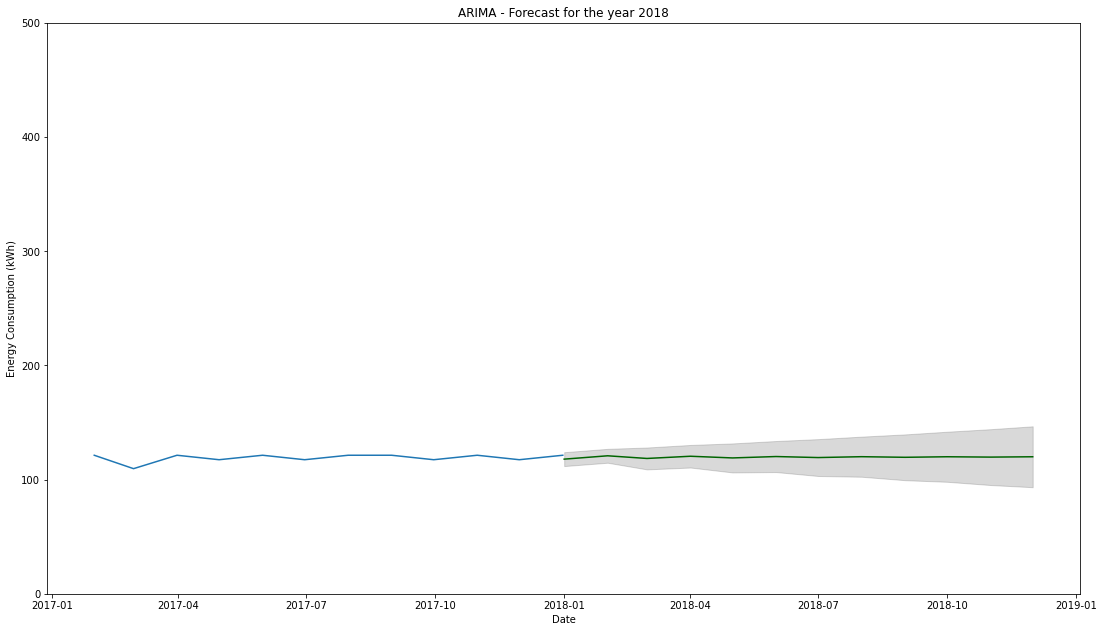

In [70]:
#Predictions
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7'].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['0xa62b9f23553ff183f61e2bf943aab3d5983d02d7'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Forecast for the year 2018")
plt.ylim(0, 500)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [64]:
#Model Defining Fitting for one meter id 0x93f617649b8e56f685131892d990dc7113585071
smodel = pm.auto_arima(data['0x93f617649b8e56f685131892d990dc7113585071'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=102.686, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=104.699, Time=0.03 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=104.686, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=104.686, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=106.686, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=101.255, Time=0.02 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=103.663, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=103.254, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=103.255, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=102.699, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=105.119, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[12] intercept   : AIC=10

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 -48.628
Date:                Wed, 03 Mar 2021   AIC                            101.255
Time:                        23:04:42   BIC                            101.860
Sample:                             0   HQIC                           100.591
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7216      0.391     -1.848      0.065      -1.487       0.044
sigma2       913.9407    406.781      2.247      0.025     116.665    1711.216
===================================================================================
Ljung-Box (Q):                       14.25   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.11   Prob(JB):                         0.58
Heteroskedasticity (H):               2.29   Skew:                             0.66
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

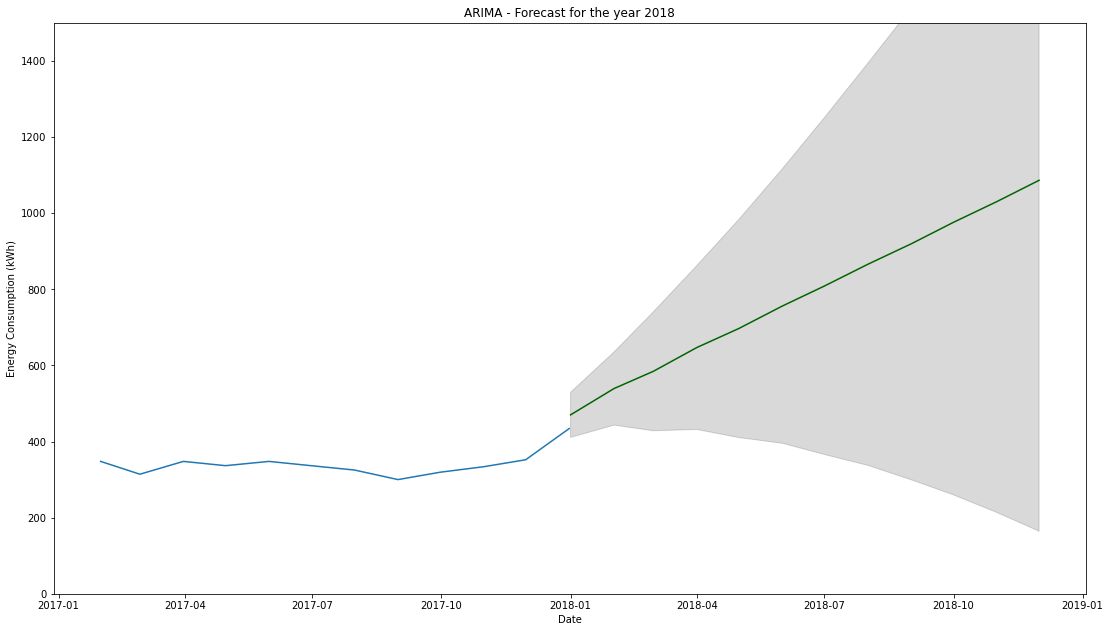

In [67]:
#Predictions
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data['0x93f617649b8e56f685131892d990dc7113585071'].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['0x93f617649b8e56f685131892d990dc7113585071'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Forecast for the year 2018")
plt.ylim(0, 1500)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [59]:
#Model Defining Fitting for one meter id 0x47218b46abb2fcaade487a211911406dc6e13730
smodel = pm.auto_arima(data['0x47218b46abb2fcaade487a211911406dc6e13730'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=133.644, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=135.644, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=135.644, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=137.644, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=133.404, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=136.622, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=134.369, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=134.839, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=133.030, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=135.010, Time=0.18 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=137.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -64.515
Date:                Wed, 03 Mar 2021   AIC                            133.030
Time:                        23:02:49   BIC                            133.635
Sample:                             0   HQIC                           132.366
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5268      0.259     -2.031      0.042      -1.035      -0.018
sigma2      2.318e+04   1.15e+04      2.015      0.044     634.658    4.57e+04
===================================================================================
Ljung-Box (Q):                       10.13   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.34   Prob(JB):                         1.00
Heteroskedasticity (H):               3.52   Skew:                            -0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

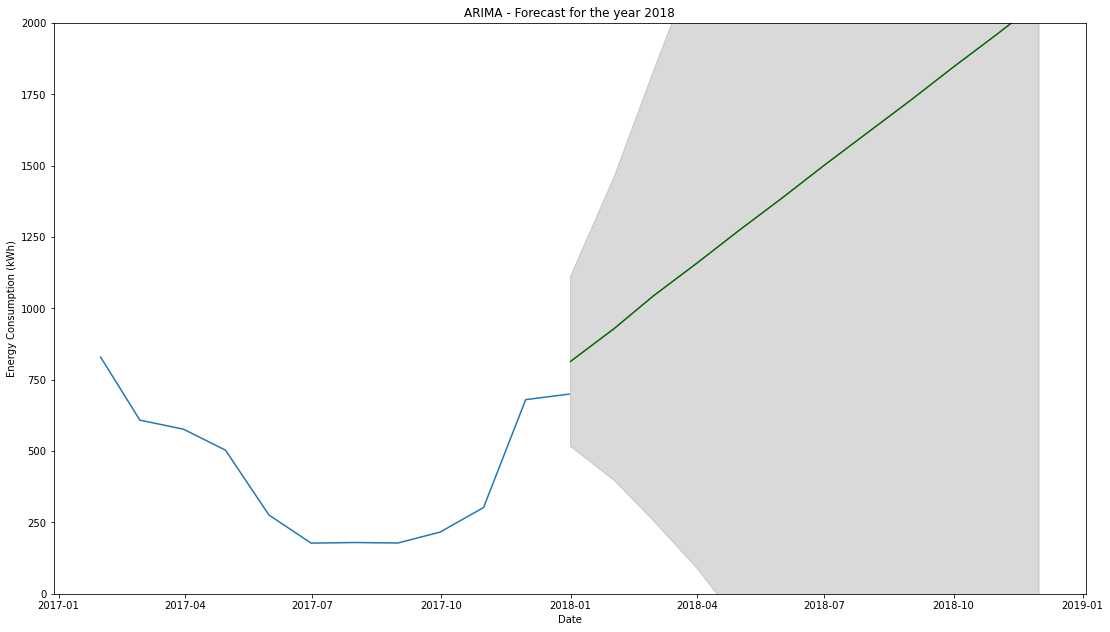

In [63]:
#Predictions
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data['0x47218b46abb2fcaade487a211911406dc6e13730'].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['0x47218b46abb2fcaade487a211911406dc6e13730'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Forecast for the year 2018")
plt.ylim(0, 2000)
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [41]:
# Initialize a dataframe for storing the prediction values.
prediction = pd.DataFrame()
prediction

Empty DataFrame
Columns: []
Index: []

In [42]:
#Defining the Model

def find_orders(ts):
    history =[x for x in train[column]]

    smodel = pm.auto_arima(history, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=1,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
    

    return smodel, smodel.seasonal_order

In [43]:
#Model Fitting and  Predicition for every Meter

for column in train:
    order, seasonal_order= find_orders(train)
    n_periods = 12
    fitted, confint = order.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')
    prediction[column]=fitted

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=65.661, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=58.056, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=63.893, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=55.699, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=56.005, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=54.287, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=56.061, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=55.213, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=54.850, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=56.388, Time=0.26 sec

Best model:

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=77.366, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.587 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.609, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.985, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.841, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.622, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.929, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.212, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.989, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=67.139, Time=0.06 sec

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.253, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.040, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.183, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=74.822, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=76.363, Time=0.28 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.374 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.183, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.528, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.415, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.156, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=74.465, Time=0.13 

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.296, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.688, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.528, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=59.329, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=59.636, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=57.918, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=59.692, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=58.844, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.481, Time=0.24 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=60.020, Time=0.22 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.523 seconds
Performing stepwise search to minimize 

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.755, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.204 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=65.692, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=58.087, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=63.924, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=55.730, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=56.036, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=54.318, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=56.092, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=55.244, Time=0.07 sec

 ARIMA(1,2,0)(0,0,0)[0]             : AIC=54.540, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=53.693, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=53.329, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=54.868, Time=0.11 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.154 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.590, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.982, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.822, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=59.623, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=59.930, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.324, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.103, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=69.251, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=68.889, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=70.428, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.163 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=82.088, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.445, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=80.320, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.077, Time=0.06 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.526, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=58.300, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=57.452, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=57.088, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.627, Time=0.11 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.114 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.915, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.302, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.147, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=62.942, Time=0.04 sec

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.159, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=67.442, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=69.220, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=68.369, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=68.007, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=69.546, Time=0.24 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.597 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=82.229, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.586, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=80.461, Time=0.01 sec

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=60.657, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=60.964, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=59.246, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.021, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=60.173, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=59.809, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=61.348, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.289 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.368, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.703, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.315, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.114, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.421, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=59.703, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.478, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=60.629, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=60.266, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=61.805, Time=0.12 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.232 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.076, Time=0.01 sec

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.683, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.058, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.914, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.695, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=68.003, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.285, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.063, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=67.212, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=66.850, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=68.389, Time=0.14 sec

Best model:

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=27.198, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=28.736, Time=0.21 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.644 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=62.855, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.252, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=61.087, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=52.895, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=53.202, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=51.484, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=53.257, Time=0.02 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.171, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57.945, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=57.097, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=56.734, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.272, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.151 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.016, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.326, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.248, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=77.945, Time=0.08 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.786, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.584, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.891, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=60.173, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.948, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=61.099, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=60.736, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=62.275, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.023 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=63.366, Time=0.01 sec

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.445, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=64.237, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=64.544, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=62.826, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=64.602, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=63.753, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=63.390, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=64.929, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.171 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=60.181, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=52.579, Time=0.02 

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.450, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=66.237, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=66.544, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=64.826, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=66.603, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=65.753, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=65.391, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=66.930, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.239 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.967, Time=0.01 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=80.511, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.267, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=72.575, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.858, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.640, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=71.786, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=71.425, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=72.964, Time=0.34 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.811 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=82.327, Time=0.02 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.615, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=65.404, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=65.711, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=63.994, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.770, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=64.920, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=64.558, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=66.097, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.543 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.740, Time=0.01 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=63.493, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.335, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.133, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.440, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=59.722, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.497, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=60.649, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=60.286, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=61.824, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.218 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.162, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=60.556, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.394, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=58.197, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=58.504, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.786, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=58.560, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=57.712, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=57.349, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.888, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=61.173, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=62.711, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.337 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.270, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.621, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.502, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=73.251, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=73.559, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=71.842, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.625, Time=0.02 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.284, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.071, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.214, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=74.853, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=76.394, Time=0.30 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.698 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=94.786, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.979, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.017, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=84.568, Time=0.08 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.188, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=75.911, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=76.220, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.504, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.291, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.434, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=75.073, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=76.614, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.291 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=99.113, Time=0.01 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=67.413, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=59.807, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=65.645, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=57.449, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=57.755, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.037, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57.811, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=56.964, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=56.600, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.139, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=60.956, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.556 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.168, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.488, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.400, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=77.109, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.418, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=75.703, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=77.492, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=76.633, Time=0.06 sec

 ARIMA(1,2,0)(0,0,0)[0]             : AIC=69.560, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=68.709, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=68.346, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=69.886, Time=0.21 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.467 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.527, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.903, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.759, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.540, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.848, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.702, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=72.010, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.293, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.074, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=71.221, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.859, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=72.399, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.484 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.341, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.707, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.443, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=76.301, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=68.080, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=68.387, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.670, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.448, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=67.597, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=67.235, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=68.774, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.966 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=64.026, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.340 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.523, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.915, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.755, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=59.557, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=59.863, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=58.145, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=59.920, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=59.072, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.708, Time=0.11 

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=72.596, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.137, Time=0.32 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.870 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.328, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.705, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.560, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.342, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.649, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.932, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.709, Time=0.03 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=63.365, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.141, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=64.292, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=63.929, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=65.468, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.371 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.411, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.637, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.643, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=83.234, Time=0.05 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.297, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.081, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.388, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.670, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.448, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=66.598, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=66.235, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=67.774, Time=0.29 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.223 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=108.389, Time=0.01 se

C:\anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.978, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.317, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.210, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.943, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=75.252, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=73.536, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=75.321, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=74.465, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=74.104, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=75.645, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=80.601, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=82.144, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.243 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.851, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.215, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.083, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.848, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=71.156, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.439, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=71.219, Time=0.02 sec

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=71.578, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.360, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=72.506, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=72.145, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=73.685, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.256 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.597, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=83.857, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.829, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=81.463, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=81.773, Time=0.11 

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=97.091, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=88.478, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=88.788, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=87.085, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=88.924, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=88.025, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=87.818, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=89.678, Time=0.10 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.458 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.216, Time=0.02 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=65.069, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=56.874, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=57.181, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=55.463, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57.237, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=56.389, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=56.025, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=57.564, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.490 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.506, Time=0.02 sec

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=84.328, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=82.617, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=84.429, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=83.553, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=83.198, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=84.743, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.407 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.212, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.579, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.444, Time=0.01 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.736, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.534, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.841, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=60.123, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.898, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=61.050, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=60.686, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=62.225, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.330 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.562, Time=0.01 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.456, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=67.837, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.688, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=65.476, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=65.783, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=64.066, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.842, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=64.993, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=64.630, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=66.169, Time=0.24 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=65.414, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=66.953, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.796 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.947, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.278, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.179, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=75.902, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=76.211, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.495, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.282, Time=0.04 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.452, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=74.236, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=73.381, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=73.020, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.560, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.172 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.406, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.712, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.638, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.330, Time=0.05 sec

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=73.915, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.198, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.981, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=73.127, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=72.765, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.306, Time=0.24 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.845 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=57.779, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=50.178, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=56.011, Time=0.03 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.119, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=60.919, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.225, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=59.507, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.282, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=60.434, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=60.071, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=61.609, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.172 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=96.336, Time=0.01 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.729, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.121, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.961, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=58.763, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=59.070, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=57.352, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=59.126, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=58.278, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=57.915, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=59.453, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=74.079, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=75.619, Time=0.30 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.555 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.420, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=56.816, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=62.652, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=54.459, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=54.766, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=53.047, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=54.821, Time=0.03 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.652, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.429, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=66.579, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=66.217, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=67.756, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.354 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.118, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.489, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.350, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.124, Time=0.07 sec

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.183, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=70.491, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.774, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.553, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=69.701, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=69.339, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=70.879, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.496 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=97.612, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.721, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=65.101, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=56.905, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=57.212, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=55.494, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57.268, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=56.420, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=56.057, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=57.595, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.450 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.107, Time=0.08 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.313, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.657, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.545, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.285, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=74.593, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.877, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=74.661, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=73.806, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=73.445, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.985, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=80.401, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.416 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.686, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.999, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.917, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=77.620, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.929, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=76.214, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=78.004, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=77.144, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=76.784, Time=0.13 

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.951, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=72.490, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.442 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.388, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.780, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.620, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=59.422, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=59.729, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=58.011, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=59.785, Time=0.02 sec

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=63.257, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.033, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=64.184, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=63.821, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=65.360, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.350 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.867, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.239, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.099, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=68.875, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.182, Time=0.07 

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=71.482, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.765, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=71.546, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=70.693, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.331, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=71.871, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.257 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.693, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.983, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.925, Time=0.02 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.774, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=86.263, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=86.574, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=84.866, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=86.690, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=85.804, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=85.452, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=86.998, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.397 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.754, Time=0.01 sec

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=62.759, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=64.298, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.244 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.616, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.985, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.848, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.620, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.928, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.211, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=69.990, Time=0.03 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=57.655, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=59.430, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=58.582, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.218, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=59.757, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.512 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=71.352, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=63.742, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.584, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.382, Time=0.04 sec

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=76.621, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.905, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.693, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.835, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=75.475, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=77.446, Time=0.06 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.047 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.578, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.893, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.810, Time=0.00 sec

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.750, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.441, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=78.750, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=77.035, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=78.828, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=77.966, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=77.607, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=79.149, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.406 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=63.251, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.648, Time=0.02 

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=73.666, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=66.052, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.898, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=63.691, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=63.998, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=62.281, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=64.056, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=63.207, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=62.844, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=64.383, Time=0.16 sec

Best model:

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.533, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=60.072, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.594 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.309, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=64.697, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=70.541, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=62.337, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=62.644, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=60.927, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=62.702, Time=0.02 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=45.806, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=47.579, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=46.732, Time=0.23 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=46.489, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=47.907, Time=0.25 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.809 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.627, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.996, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.859, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.631, Time=0.09 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=90.272, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=81.897, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=82.207, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.494, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=82.297, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=81.428, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=81.071, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=83.051, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.883 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.268, Time=0.03 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.635, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.523, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.263, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=74.572, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.855, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=74.640, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=73.785, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=73.423, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.964, Time=0.25 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.628 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=66.934, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=59.328, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=65.166, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=56.970, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=57.277, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=55.559, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57.333, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=56.485, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=56.122, Time=0.27 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=57.660, Time=0.54 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=92.833, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.070, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.065, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.670, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=82.981, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.268, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=83.074, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=82.203, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=81.846, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=83.390, Time=0.22 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.495, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=76.216, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=76.524, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.809, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.596, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.739, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=75.378, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=76.919, Time=0.36 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.950 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.509, Time=0.02 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.243, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.241, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.842, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=83.152, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.440, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=83.247, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=82.375, Time=0.44 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=82.019, Time=0.28 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=83.563, Time=0.49 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.784 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=73.746, Time=0.23 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.606 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.844, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=57.240, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=63.076, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=54.882, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=55.189, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=53.471, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=55.244, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=54.397, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=54.033, Time=0.11 

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=62.400, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=63.875, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.598 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65.177, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59.204, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63.250, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=61.136, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=57.226, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=59.179, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=59.100, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.257, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.171, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=70.558, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.345, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=71.388, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=69.139, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=70.217, Time=0.04 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.383 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88.636, Time=0.01 sec
 A

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=66.309, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=67.457, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=63.633, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=65.610, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.923 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=84.315, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.537, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=82.752, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.664, Time=0.01 sec

B

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=54.754, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=55.371, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=55.760, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=55.661, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=53.904, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=nan, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.951 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81.936, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=76.362, Time=0.03 sec
 ARIMA(

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=69.938, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=71.927, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=71.886, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.814 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.921, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.720, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.967, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=80.697, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=77.545, Time=0.02 sec
 A

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=101.742, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.604 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=92.364, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.754, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=90.744, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.487 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=70.195, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.303, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=68.198, Time=0.02 sec
 ARIMA

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.922 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.713, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.745, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.717, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.713, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=79.441, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.425, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=81.401, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.1

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=64.190, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=60.952, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=62.870, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=62.773, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.040 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.729, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=60.601, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=62.745, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=62.601, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 A

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.325, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.588, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.396, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=88.540, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=85.444, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=87.198, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=86.921, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=86.886, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 2.387 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72.901, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70.953, Time=0.06 

 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=nan, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.277 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.309, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.337, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.465, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.137, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.526, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.914, Time=0.03 sec
 ARIMA(1,2

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.473, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.434 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=68.933, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.283, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=67.301, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.394, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.203, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=66.177, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=67.847, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=67.372, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=67.380, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.827, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.439, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.506, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.399 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.022, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.052, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.042, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.052, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=63.824, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.728, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=65.617, Time=0.04 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=66.572, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.512, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=68.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.825 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=76.988, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.916, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.012, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=77.106, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=77.008, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=73.042, Time=0.03 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=75.262, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.647, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=76.221, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=75.957, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=77.441, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.471 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.499, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=67.781, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.031, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=65.626, Time=0.05 sec

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=57.755, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=60.895, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=58.521, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.555 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.964, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.507, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.974, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.501, Time=0.05 sec
 ARIM

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.522, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.616, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.522, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=87.454, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=84.215, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=86.208, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=86.190, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.984 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.069, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.812, Time=0.08 sec

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.350, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.003, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=71.330, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.319, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.072, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=70.158, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=69.502, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=71.272, Time=0.16 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.079 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72.490, Time=0.02 sec

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.482, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=56.557, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=62.650, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=55.157, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=55.526, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=53.913, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=54.569, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=54.917, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=54.809, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=53.060, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=nan, Time=0.04

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.406, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.774, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.640, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=73.371, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=73.678, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=71.954, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.779, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=72.879, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=72.507, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=74.054, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fi

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79.334, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81.754, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=77.334, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=79.910, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=79.334, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=75.344, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=77.343, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=77.335, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.122 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=79.362, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.516, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.842, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.650, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.426 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.567, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=82.683, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.772, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.423 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79.513, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80.957, Time=0.01 sec
 

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.569, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.253, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=74.977, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=76.974, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=76.968, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.882 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=92.914, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=93.525, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.334, Time=0.01 sec

B

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=55.449, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=57.399, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=57.319, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.983 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=75.062, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.980, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.883, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.163, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.392 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.705, Time=0.02 sec
 ARI

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.254, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=64.266, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=70.393, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=63.363, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=63.784, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=62.163, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=62.304, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=63.206, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=63.207, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=61.358, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=83.059, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=85.054, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=85.046, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.747 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.731, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=90.847, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.941, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.460 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.325 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.643, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.738, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.865, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.518, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67.920, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.049, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.744, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=66.969, Time=0.09 sec
 A

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.945 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85.477, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82.465, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83.491, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83.626, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=80.865, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=82.235, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=82.132, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=84.130, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=63.401, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.119 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=60.770, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=61.486, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=58.939, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59.764, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60.894, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=57.093, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=59.068, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=77.317, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=78.634, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.635 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=93.594, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=89.072, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=91.603, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=89.195, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=87.124, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=87.376, Time=0.03 sec
 A

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=107.984, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=107.963, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=105.188, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.202 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88.018, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=89.178, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=89.048, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=86.663, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.444 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=93.680, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=92.245, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 se

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.626, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=93.272, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.709, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=94.916, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=91.696, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=93.435, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=93.231, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=91.235, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.852 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=58.795, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.215 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.822, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.031, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=105.103, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=105.426, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=103.374, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=103.699, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit tim

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=66.894, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=68.671, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.766 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.005, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81.677, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80.315, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.344 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71.074, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66.305, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=69.084, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=67.611, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=64.340, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=65.654, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.772 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=91.590, Time=0.01 sec
 ARIM

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=83.517, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=73.241, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=74.219, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=71.711, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=72.153, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=73.132, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=75.109, Time=0.22 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.178 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=102.024, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103.997, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=103.993, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=101.243, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Tot

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=74.964, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.017, Time=0.08 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.955 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84.099, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81.706, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82.149, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83.127, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=80.193, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=81.781, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=81.700, Time=0.10 sec

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.952 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79.069, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=77.929, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=77.337, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76.379, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.285 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=74.150, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.820, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.461, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=70.948, Time=0.01 sec

Bes

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84.168, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.195 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=73.543, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=70.384, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=71.994, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72.036, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=69.337, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.171 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=87.206, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=87.663, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=85.626, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time:

 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.781 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74.254, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70.036, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=72.281, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=71.577, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=68.127, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=69.684, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best mo

 ARIMA(3,2,0)(0,0,0)[0]             : AIC=75.314, Time=0.08 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 1.148 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=92.550, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88.353, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.558, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=89.539, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=86.459, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=87.699, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.7

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=70.734, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.071, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.206, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.468, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=72.129, Time=0.09 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.416 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.998, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.240, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=77.018, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=76.601, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

 ARIMA(3,2,0)(0,0,0)[0]             : AIC=71.395, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.837 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103.683, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103.789, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=102.043, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.452 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.652, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=64.578, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=68.087, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=61.205, Time=0.09 sec
 

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=101.777, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=103.917, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=99.243, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=100.384, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=100.283, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=102.283, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.997 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=108.193, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=109.150, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=108.989, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106.766, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.323 seconds
Performing stepwise search to mi

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.809 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.727, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=91.738, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.732, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=92.787, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=89.885, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=91.030, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best mo

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=83.216, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=81.006, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=620640898.577, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.092 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=76.156, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.550, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74.463, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.369 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94.212, Time=0.01 sec


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76.086, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=76.570, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=73.409, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=74.989, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.857 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84.921, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.603, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82.985, Time=0.03 sec
 ARIM

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=95.733, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=92.955, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.252 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=111.725, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=109.362, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=109.759, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=110.755, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=108.025, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=109.652, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=109.671, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=107.724, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Ti

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=105.663, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=115.213, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=116.890, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=116.849, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=114.117, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.274 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=110.910, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=111.237, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=109.306, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103.565, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=105.289, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=101.734, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.262 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=23.883, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=16.172, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=22.136, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=13.465, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=13.041, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=12.282, Time=0.31 sec
 ARIMA(2,2,1)(

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.889, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.307 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.878, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.378, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.925, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.784, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=69.613, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.178, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60.734, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62.618, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=62.534, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=58.893, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=60.747, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=60.737, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.792 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.325, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=84.245, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 A

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81.495, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.242 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=39.149, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=37.308, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=37.234, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.375 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66.782, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60.652, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=64.839, Time=0.01 sec
 ARIMA(

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.871, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.837, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.212, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.277 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.736, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.131, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.736, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.076, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=74.092, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 A

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60.530, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.229 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=54.019, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=47.183, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=52.258, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=45.865, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=46.536, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=44.076, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=45.185, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=44.796, Time=0.12 sec

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65.147, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62.088, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63.147, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=63.271, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=60.089, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=61.298, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.822 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.721, Time=0.01 sec
 ARIM

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.805 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=86.410, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83.254, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84.444, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=84.579, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=81.524, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=82.917, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.951 s

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=92.239, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=85.150, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=81.542, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=83.182, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=83.111, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.918 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.422, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.775, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.643, Time=0.01 sec
 A

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=69.145, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=70.842, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.973 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=73.668, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=62.143, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.672, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=60.061, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=58.464, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIM

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82.068, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.140, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.122, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=80.090, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76.868, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.215 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.214, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=90.869, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.259, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.352 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=113.057, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=111.462, Time=0.02 

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=64.075, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=64.065, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=66.059, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.732 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.725, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.599, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.805, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=77.376, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.150, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=78.545, Time=0.05 sec

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=72.378, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=nan, Time=0.07 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.797 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=73.077, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.116, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.259, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.766, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=73.222, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.349, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.830, Time=0.02 sec
 ARI

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=58.345, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.473 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81.570, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=79.571, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=79.807, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=76.768, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=77.813, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=110.376, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.428 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=91.376, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.575, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.445, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.122, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.364 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=105.623, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=103.885, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=103.599, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.059, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit 

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.937, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.407 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=107.609, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=104.662, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.574, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.848, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.225 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=109.373, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=107.763, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=106.097, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=105.776, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total f

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=98.323, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=98.233, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=88.351, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86.644, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.218, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.218 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=91.971, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=92.699, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.183, Time=0.01 sec

B

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.805, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=76.050, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.689, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=73.802, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.829, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.937, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=71.887, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.757 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIM

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=98.797, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=99.601, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=99.219, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.904 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.971, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.517, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.177, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=68.201, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=68.955, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 A

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.773, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.549, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.946 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=70.016, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67.384, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=68.091, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=68.913, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=65.606, Time=0.03 sec
 ARIM

 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.015 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=105.801, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.590, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=103.507, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.758, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.388 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=104.955, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=103.358, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=102.871, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=101.483, Time=0.01 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=80.503, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.475, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.031 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=94.972, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=96.261, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.060, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.280 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.007 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.283, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=76.516, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78.177, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.627 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=75.803, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.682, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.086, Time=0.08 sec
 ARIMA(0,

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=98.977, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=96.129, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=97.049, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.439 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=66.657, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.769, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=64.682, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=57.463, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIM

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=71.513, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.248 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.603, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.344, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.928, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.942, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=71.926, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.971, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=74.368, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=70.606, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=70.350, Time=0.06 

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.105, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.757, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.490, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.091, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.853, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=70.098, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.849 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.970, Time=0.01 sec
 ARIM

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=112.301, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=112.543, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=109.668, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.429 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.081, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.830, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.441, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.036, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=71.806, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.221, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.908, Time=0.

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=61.384, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=57.822, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=55.876, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.776, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=56.501, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.435, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.788 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72.214, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74.196, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74.184, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=70.811, Time=0.01 

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59.360, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=57.253, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=54.395, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=55.263, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.707 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.043, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.922, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.143, Time=0.01 sec
 ARIM

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=80.041, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=76.461, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=78.461, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=78.442, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=77.923, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.847 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.575, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.348, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.635, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.335 seconds
Performing stepwise search to minimize aic
 ARI

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.566, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.247, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.602, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.198, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=72.089, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.484, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=69.359, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=69.721, Time=0.10 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.317 seconds
Performing stepwise search to minimize aic
 A

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=110.164, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=106.520, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.326 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.099, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.946, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.105, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=75.656, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.110, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=73.970, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=73.382, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 s

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=73.311, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.642, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=71.413, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.373 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=74.293, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.077, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.527, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.695, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.071, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=71.097, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.575, Time=0.04 

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=87.310, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=88.757, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=86.119, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=86.659, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=87.971, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=87.712, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=86.951, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=89.709, Time=0.10 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.302 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.104, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.252, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.827, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.957, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.829, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.261 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=89.827, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.443, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=91.030, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=95.814, Time=0.22 sec
 ARI

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.530, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.279 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.723, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=108.007, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.732, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.290 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.338, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.109, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.527, Time=0.02 sec
 ARI

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.275 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.665, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.913, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.041, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.084, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=79.125, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.275, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.871 

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.968, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.201 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=84.849, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.698, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=83.273, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=84.567, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=82.669, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=84.223, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.232, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.534, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.311 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.263, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.481, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=70.627, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=59.621, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=61.608, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=58.408, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=63.524, Time=0.00 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.224, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=82.580, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.410, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=83.721, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=80.872, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=82.300, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=82.007, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.036 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.835, Time=0.01 sec
 A

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.516, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.175, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.559, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.229, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=73.365, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.551, Time=0.03 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 1.229 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.460, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.181, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 A

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=58.628, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56.695, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=60.761, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=58.681, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=58.671, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=60.663, Time=0.20 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.101 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59.240, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=58.963, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.489, Time=0.01 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=87.054, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.081, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.054, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=85.053, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.979, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.214 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=80.940, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.228, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.978, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=76.969, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.289 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.390, Time=0.01 se

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=54.787, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=51.570, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=52.840, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=52.486, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=49.636, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=50.698, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=50.528, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=52.065, Time=0.03 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.839 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=61.965, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=61.285, Time=0.03 

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=81.922, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=78.106, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.945, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.970 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.888, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.988, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=80.027, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.965, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIM

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.153 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=73.637, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71.070, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=71.720, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=71.786, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=69.388, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.140 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.860, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=67.333, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.864, Time=0.00 sec

Bes

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=55.280, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=57.272, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=57.265, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.038 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=100.709, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.277, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=99.660, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.448, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=101.313, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=102.619, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=98.212, Time=

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=69.055, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.385, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.038, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=67.191, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=68.134, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.764 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.035, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.266, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIM

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.804, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.357, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.823, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.550, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.468, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=77.204, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=77.014, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=78.955, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.052 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=78.517, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.310, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=79.953, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.273 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.272, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99.841, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.633, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best 

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.419, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.995, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.305, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.026, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=66.943, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=67.476, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.240 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.412, Time=0.01 sec
 ARIM

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.575 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=87.752, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=92.532, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.521, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=90.578, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=88.240, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=89.433, Time=0.30 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=85.013, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=86.665, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=86.111, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

 ARIMA(1,2,0)(0,0,0)[0]             : AIC=89.836, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=91.661, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.291 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=101.015, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=125.332, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=99.950, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=101.303, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=103.015, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.812, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.550, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=93.866, Time=0

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.658 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.374, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=73.357, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.843, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=73.690, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=71.737, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=71.756, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.951 

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=86.583, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=86.088, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=82.631, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=84.977, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=84.587, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=84.088, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.604 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=77.004, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.946, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.034, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.064, Time=0.02 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.994, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=67.150, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.896 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.007, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=96.174, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.018, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.222 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.462, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=83.925, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=80.511, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=82.084, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.877 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=98.409, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.652, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=96.502, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=96.776, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.389, Time=0.01 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.994, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.748, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.416, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=81.284, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=77.935, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.349, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.592 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.373, Time=0.01 sec
 ARIM

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.965, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.352, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.951, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=69.531, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.005 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.155, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.449, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.421, Time=0.01 sec
 ARIM

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.531, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.242 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=106.698, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=107.316, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104.700, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.469 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=62.082, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.379, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=60.271, Time=0.02 sec
 ARI

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.777 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.791, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.728, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.896, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=80.818, Time=0.17 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=82.381, Time=0.23 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.649, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=79.937, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=81.512, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=81.258, Time=0.06 sec

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.810, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.474, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.265, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.570 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=102.569, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=125.374, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=102.976, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=104.093, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=103.866, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=103.727, Time=0.03 sec
 ARIMA(2,0,

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.436, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=98.124, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=91.372, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=87.452, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=89.392, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 2.618 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.261, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.869, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIM

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=92.767, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.941, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=90.777, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=89.975, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=88.013, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=87.975, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=88.324, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.200 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=90.590, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.758, Time=0.02 sec

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=99.613, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=95.344, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=98.120, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=97.241, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=96.029, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=96.638, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=95.538, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=100.722, Time=0.33 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 5.038 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=105.556, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=102.689, Time=0.0

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=77.526, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.490, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=79.451, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=77.930, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.718 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.308, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.168, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.324, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.496 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=57.578, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=57.630, Time=0.03 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 0.942 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.490, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.604, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.508, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=76.866, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.671, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=75.184, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=74.958, Time=0.04 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=100.105, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.047, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=98.385, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.409 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=82.902, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.244, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.030, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=76.007, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.263, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.085 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.858, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.702, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.878, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=95.591, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=97.470, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=93.626, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=93.702, Time=0.05 sec
 ARIM

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.264, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.966, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.033, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.376 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=82.336, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.211, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=80.462, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=81.086, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=78.299, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.430, Time=0.06 sec

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=84.785, Time=0.13 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 1.301 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=84.564, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85.576, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83.134, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83.577, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=84.351, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=81.438, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=82.367, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=82.716, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=83.494, Time=0.05 

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.988, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.934, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.110, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.770 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=72.103, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.510, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72.273, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=74.493, Time=0.27 sec
 ARI

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92.121, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.571, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.493, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.344 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.469, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.327, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.489, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.459 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.462, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.438, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARI

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.971 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=86.133, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.148, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=84.549, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.664, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.332 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=101.908, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.404, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=103.383, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=100.382, Time=0.14 sec


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.732, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=96.939, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.879, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.498 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.676, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.853, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.679, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.847 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.266, Time=0.02 sec
 ARIMA(

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.895, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.743, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.056 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.176, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.289, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.184, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.340 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84.355, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.669 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.092, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.535, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.434, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.665 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=58.531, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=102.265, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=59.760, Time=0.07 sec
 ARIMA

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=95.523, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=91.822, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.410, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=93.374, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.479 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=92.519, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.463, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=94.310, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARI

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 1.266 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=83.450, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84.879, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82.591, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.494 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.663, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.520, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.666, Time=0.01 sec
 ARIMA(2,2,

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.928 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=103.466, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.371, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=101.599, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.350 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.175, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.046, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.343, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.361

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=87.609, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=85.624, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=85.624, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=88.230, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.240 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=90.577, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.466, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=88.610, Time=0.01 sec

Best

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.809 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.113, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=67.488, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.348, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.418 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.945, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.307, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.338, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.246 se

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.649, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.948, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.698, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.576 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.735, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.879, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.785, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=71.171, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=70.763, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)

 ARIMA(3,2,0)(0,0,0)[0]             : AIC=73.686, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=72.990, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.603 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.919, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.760, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.122, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.418, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=78.877, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.513, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 A

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.828, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.375 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59.323, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59.732, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.336, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.413 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=54.093, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=53.519, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=52.104, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.363

 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=85.832, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.422 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.972, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.180, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=97.190, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.399 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.704, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=89.668, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=89.682, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.141, Time=0.02 sec

Be

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.227, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.473, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.553, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.265 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.190, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=88.935, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=87.654, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.382 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.166, Time=0.01 sec
 ARIMA(

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.799 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.559, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.299, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.641, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=74.388, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.355, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.435, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.880 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=99.068, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=97.214, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=97.098, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.393 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=97.387, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=94.825, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.403, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.549, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.363 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=97.113, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=96.149, Time=0.01 sec
 

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=77.228, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.276 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=113.560, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=109.865, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=111.586, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=107.882, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=109.444, Time=0.44 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=105.900, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=107.865, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=107.605, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.500, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.998 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=121.656, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.242, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=123.640, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=115.121, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=113.149, Time=0.13 sec
 AR

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.671, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=79.669, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76.682, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.375 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=108.857, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=104.088, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=106.866, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=93.334, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=95.319, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.033, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=66.183, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=75.243, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=62.440, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=62.262, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=60.784, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=63.580, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.636 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIM

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.369, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.403, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.429, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=86.823, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=83.406, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=84.831, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.976 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=104.010, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104.939, Time=0.01 sec


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=80.696, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.793 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88.158, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=90.105, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=86.181, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.203 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.979, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=88.173, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.259

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.267 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=90.714, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.132, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.356, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.337 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=90.729, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.988, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=88.729, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=87.477, Time=0.07 sec
 ARIMA(

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=72.533, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=74.187, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=74.062, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=74.814, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=76.041, Time=0.03 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.819 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.310, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.139, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.487, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=69.390, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=70.825, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.335 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.465, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.514, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.624, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=88.794, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=85.516, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=86.806, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=82.102, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=78.350, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=80.159, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=80.132, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.806 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=99.425, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.321, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=101.332, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=100.910, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=86.546, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=86.869, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84.746, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.395 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=80.997, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=77.343, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.998, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=79.027, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=75.355, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.199 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.324, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.754, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.719, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.827, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.366 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=119.504, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=115.591, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=117.468, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=113.607, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.372 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.137, Time=0.01 sec


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=99.300, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.434 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.017, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.955, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=81.038, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.091, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.228 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.167, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=93.618, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.167, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=101.106, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=103.108, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=94.825, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=93.114, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.939, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.839, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.361 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.171, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.088, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.183, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.613, Time=0.0

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=99.480, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.475 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=112.807, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=114.791, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=111.042, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.403 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.256, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=94.627, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.536, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=96.409, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=96.808, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=97.391, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=97.694, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=99.391, Time=0.14 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.197 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=88.211, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=88.926, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.922, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.494 seconds
Performing stepwise search to minimize aic
 ARI

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=83.539, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=84.368, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.863, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=82.265, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=82.193, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=81.983, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=82.200, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=83.943, Time=0.13 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.890 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.076, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.023, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.155, Time=0.

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=88.188, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.008, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.337 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.186, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.361, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80.248, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.198 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=115.777, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=112.881, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIM

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=99.124, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=101.123, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=101.123, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=97.229, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.218 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=70.503, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.725, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=68.742, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.492, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=66.960, Time=0.04 sec
 ARIMA(2,2,0)(0

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=99.922, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=99.787, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.403, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.197 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74.128, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=74.085, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.489, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.287 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=90.057, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=86.266, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARI

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=86.698, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=88.697, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=88.697, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=87.349, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=90.600, Time=0.10 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.660 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=112.519, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=112.989, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=110.972, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=110.990, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=112.792, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=109.088, T

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=114.266, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=116.263, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=116.263, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=112.281, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.312 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=96.323, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=97.973, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94.347, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.329 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=113.182, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=151.883, Time=0.01

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86.431, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.009, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=88.289, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=88.364, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=87.298, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=90.051, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.676 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=75.151, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.223, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.300, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=72.304, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=70.303, Time=0.

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=96.515, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=98.498, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=98.486, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94.679, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.264 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.788, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=84.416, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.053, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.284 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78.528, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78.168, Time=0.08 sec
 

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=100.042, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.807, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=98.085, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.312 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=112.742, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=109.921, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=110.817, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=110.653, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=107.921, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=108.669, Time=

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=76.261, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=75.202, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.467, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.216 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=126.378, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=128.338, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=128.330, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=124.412, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.200 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=66.276, Time=0.01 sec


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=88.907, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.431 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=101.776, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.564, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=99.808, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.350 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.970, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.798, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.970, Time=0.01 sec

B

 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=87.129, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=87.094, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.063 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=64.600, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.002, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=63.711, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.110, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=65.205, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=66.596, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=61.785, Time=0.02 sec

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=88.696, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=86.224, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=87.364, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=84.384, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=85.921, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=85.503, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.872 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107.514, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=107.613, Time=0.09 sec


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.050 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=101.395, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.408, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=103.321, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.741 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=83.344, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.799, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=77.258, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.637, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=79.035, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=81.111, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.531 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.439, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=93.686, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.456, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit tim

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=109.038, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=108.588, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=107.067, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.392 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.208, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=96.744, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.298, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.317 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.675, Time=0.01 sec
 AR

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.379, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=77.011, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.270 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.419, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=99.422, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.515, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=99.835, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=97.426, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=97.838, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=100.135, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=105.037, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=102.246, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=103.044, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=nan, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=95.821, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=95.428, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=93.785, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=95.509, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=93.246, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=nan

 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=82.790, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=79.392, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=80.334, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=81.023, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.252 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=93.552, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.627, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.746, Time=0.01 sec
 ARIM

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=81.615, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=78.046, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=75.963, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=76.171, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.828 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=90.781, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.176, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.552, Time=0.01 sec

Best

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.461, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.443 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=99.605, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.266, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=97.611, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.287 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=91.295, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=87.297, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88.919, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=85.316, Time=0.01 sec

Be

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=112.453, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=109.703, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=110.514, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=111.528, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=107.709, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=109.563, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.216 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.391, Time=0.01 sec

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=90.667, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.944, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=91.886, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=88.984, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=90.579, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=90.608, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=89.333, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=92.573, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.921 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=87.534, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=86.521, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.352, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84.255, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80.660, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.283 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=108.496, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.925, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=106.498, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=106.442, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=104.017, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=104.444, Time=0.

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=99.511, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=87.294, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=85.754, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=84.395, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=85.295, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=86.543, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.007 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=104.057, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=105.832, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.138, Time=0.01 

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=76.076, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=75.249, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=72.081, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.295 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=97.337, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=97.359, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=95.391, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=73.255, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.417, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARI

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.756 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.543, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=83.400, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.569, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.299 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=85.114, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.343, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=83.871, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=85.802, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.685, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.128, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=76.692, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.341 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=94.664, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=96.184, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.838, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.228, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=94.743, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=96.231, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=90.950, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=92.876, Time=0.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82.273, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81.508, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.458, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81.383, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=79.737, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.279 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65.457, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=64.240, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63.465, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.263 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.486, Time=0.02 sec
 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.489, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=75.481, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=75.266, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=74.750, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=76.975, Time=0.05 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.751 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=105.046, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=101.497, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103.484, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=103.322, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=99.683, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.211 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.1

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.492, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=83.820, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=79.164, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=81.157, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.901 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=111.870, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=110.351, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=110.701, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=108.371, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.318 seconds
Performing stepwise search to minimize aic


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.005, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=89.142, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=91.080, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=90.246, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=88.042, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.283, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=90.001, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=91.934, Time=0.18 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.130 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=66.567, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.479, Time=0.03 

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.763, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.276, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.767, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.277 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.412, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.600, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=93.481, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.444 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=89.879, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]  

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.670, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.309, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111.861, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.888, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.932, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=104.497, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=106.462, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=106.367, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.040 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.797, Time=

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=96.410, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=97.040, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.698, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.275 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=92.154, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94.098, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=93.980, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.172, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.428 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=90.325, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=89.504, Time=0.01 sec
 

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=84.429, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=79.238, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=81.190, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=81.218, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=81.470, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=82.999, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.617 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.390, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=99.883, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.775, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.321 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 

 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.792 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=105.333, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=106.979, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=103.340, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.355 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.306, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.667, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.460, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=84.886, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.262 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=104.326, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=104.370, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=104.685, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.386, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.435 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=101.527, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.721, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=98.066, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=95.655, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.196 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.161, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=108.031, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=107.986, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.884, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.318 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.428, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=84.392, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=77.108, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=73.311, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.345 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.633, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=78.473, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.723, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=75.708, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=77.474, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=78.425, Time=0.04 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 

 ARIMA(0,2,0)(0,0,0)[0]             : AIC=97.079, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.197 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.646, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.190, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.830, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.240 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.017, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=97.319, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.095, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=98.809, Time=0.06 sec
 A

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.051, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=85.744, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.169, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=86.378, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=88.089, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=83.803, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=84.684, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=85.109, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.913 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=77.188, Time=0.01 sec

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=121.173, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=117.411, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.159 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.072, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.525, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=79.950, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.209 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=80.834, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=81.968, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIM

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=115.396, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=117.251, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=113.540, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.182 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=105.091, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=106.050, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=103.219, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.136 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=97.953, Time=0.01 sec
 

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.104, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=82.776, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=82.104, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.182 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.960, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70.536, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=69.592, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.212 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=83.298, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.734, Time=0.05 sec
 ARI

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=66.073, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=66.815, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=64.880, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.181 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=107.814, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.849, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=108.853, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=107.909, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=107.610, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 s

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.376, Time=0.02 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 0.368 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.031, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.681, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.082, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=95.452, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=93.867, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=94.401, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.487 seconds
Performing stepwise search to minimize aic
 ARIM

 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=77.233, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=76.665, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=77.711, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=77.928, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=78.273, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=79.590, Time=0.05 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.481 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85.235, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=86.718, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=87.181, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.169 seconds
Performing stepwise search to minimize aic
 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=64.782, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65.973, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=66.176, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=64.525, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=nan, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.495 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=85.032, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=82.380, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.529, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=76.343, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=76.950, Time=0.07 sec


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=94.985, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.182 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=87.601, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.697, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=85.602, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.180 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.424, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=101.930, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.460, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=102.230, Time=0.05 sec


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=75.079, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=76.783, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=76.898, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=76.303, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=78.758, Time=0.07 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.488 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.388, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=106.348, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.493, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.176 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=81.643, Time=0.06 se

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=114.646, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=112.842, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=112.656, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.136 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.073, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=68.795, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.376, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.183 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=81.380, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=80.210, Time=0.02 sec
 

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.776 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.660, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=71.948, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=78.115, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=70.625, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.699, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=74.322, Time=0.03 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.518 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=102.665, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.269, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.846, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=100.710, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=98.271, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=98.748, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.535 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=153.492, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=144.095, Time=0.02 

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=116.666, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.853, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.180, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111.676, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.671, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=113.516, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.521 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=78.867, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.032, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.023, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.178 seconds
Performing stepwise search to minimize

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=73.683, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=75.350, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=75.281, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=74.531, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=77.281, Time=0.06 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.495 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=86.149, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.812, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84.387, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=84.417, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81.802, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.123 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 se

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103.875, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 2.224 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=72.178, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=72.424, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=70.429, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.159 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=105.151, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=107.138, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=107.141, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104.262, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.149 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=99.709, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=101.634, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=101.576, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=100.261, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.189 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=93.267, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=92.821, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=91.323, Ti

 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=95.265, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.192 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=132.292, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=153.451, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=130.609, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=132.316, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.995, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.724, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=131.339, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.864, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=94.990, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=95.474, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=92.511, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=90.071, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=99.116, Time=0.05 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.742 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103.708, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=101.102, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104.882, Time=0.01 

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=93.346, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=94.595, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=95.177, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.841 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.153, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.714, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=89.520, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=88.265, Time=0.04 sec
 ARIM

 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.516 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=79.222, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=79.759, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.293, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.212 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=97.752, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=95.218, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=95.740, Time=0.02 sec
 ARIMA(0,2

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=92.138, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=98.909, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=90.175, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=97.184, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=92.172, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=89.985, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=91.418, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=91.498, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=94.236, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=93.364, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.433 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=87.544, Time=0.05 sec
 ARIMA(0,2,

In [44]:
#Predictions of the model

prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
0                                   115.385422   
1                                   119.951064   
2                                   114.333147   
3                                   117.870028   
4                                   113.654401   
5                                   115.641917   
6                                   112.957168   
7                                   113.543682   
8                                   112.064115   
9                                   111.671198   
10                                  110.942212   
11                                  110.012141   

    0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
0                                   466.658197   
1                                   485.162194   
2                                   462.374316   
3                                   476.753900   
4                                   459.610816   
5                                   467.738659   
6                                   456.784998   
7                                   459.237473   
8                                   453.176171   
9                                   451.643085   
10                                  448.645201   
11                                  444.911054   

    0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
0                                   298.199168   
1                                   310.008537   
2                                   295.472433   
3                                   304.632520   
4                                   293.713512   
5                                   298.873288   
6                                   291.910032   
7                                   293.446795   
8                                   289.602815   
9                                   288.602093   
10                                  286.705074   
11                                  284.308730   

    0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
0                                   447.520714   
1                                   465.262669   
2                                   443.414886   
3                                   457.198305   
4                                   440.766384   
5                                   448.552848   
6                                   438.057070   
7                                   440.401360   
8                                   434.596019   
9                                   433.120110   
10                                  430.250245   
11                                  426.666022   

    0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
0                                   897.216823   
1                                   932.895494   
2                                   888.910307   
3                                   916.738129   
4                                   883.557404   
5                                   899.380390   
6                                   878.115709   
7                                   882.985802   
8                                   871.186225   
9                                   868.324889   
10                                  862.486315   
11                                  855.325436   

    0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
0                                   467.302398   
1                                   485.832040   
2                                   463.012544   
3                                   477.412114   
4                                   460.245213   
5                                   468.384365   
6                                   457.415504   
7                                   459.871367   
8                                   453.801709   
9                                   452.266427   
10                                  449.264480   
11                                  445.525054   

    0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79  \
0                                    51.887474  

In [45]:
# Store the predictions in .csv file

prediction.to_csv('data/ARIMA_predictions.csv')

## 2 Prophet Model

In [1]:
# Importing the required libraries and packages
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Importing plotly failed. Interactive plots will not work.


Populating the interactive namespace from numpy and matplotlib


Reading the preprocessed consumption dataset for forecasting.

In [2]:
consumption = pd.read_csv('data/consumption_prepped.csv', index_col='meter_id')
consumption = consumption.transpose()
consumption = consumption.reset_index()
consumption

meter_id       index  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
0         2017-01-01                                       3.517   
1         2017-01-02                                       3.517   
2         2017-01-03                                       3.517   
3         2017-01-04                                       3.517   
4         2017-01-05                                       3.517   
..               ...                                         ...   
360       2017-12-27                                       4.503   
361       2017-12-28                                       4.503   
362       2017-12-29                                       5.129   
363       2017-12-30                                       5.129   
364       2017-12-31                                       5.395   

meter_id  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
0                                             18.057   
1                                             18.057   
2                                             18.057   
3                                             18.057   
4                                             18.057   
..                                               ...   
360                                           24.618   
361                                           24.618   
362                                           15.167   
363                                           15.167   
364                                           11.751   

meter_id  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
0                                             16.324   
1                                             16.324   
2                                             16.324   
3                                             16.324   
4                                             16.324   
..                                               ...   
360                                           17.705   
361                                           17.705   
362                                            8.966   
363                                            8.966   
364                                            4.633   

meter_id  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
0                                             14.012   
1                                             14.012   
2                                             14.012   
3                                             14.012   
4                                             14.012   
..                                               ...   
360                                           23.993   
361                                           23.993   
362                                           15.841   
363                                           15.841   
364                                           14.452   

meter_id  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
0                                             30.378   
1                                             30.378   
2                                             30.378   
3                                             30.378   
4                                             30.378   
..                                               ...   
360                                           25.871   
361                                           25.871   
362                                           46.274   
363                                           46.274   
364                                           16.901   

meter_id  0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
0                                             20.607   
1                                             20.607   
2                                             20.607   
3                                             20.607   
4                                             20.607   
..                                               ...   
360                                           17.173   
361                                        

In [3]:
# Checking if there are still any NaN values. If NaN values exist, replace them with 0.
# This is done with the intention of avoiding potential exceptions during the model fitting process.

consumption.isnull().sum().sum()
consumption = consumption.fillna(float('0'))

In [4]:
consumption.isnull().sum().sum()

0

It is found that no more NaN values exist in the dataset and hence, we are good to go for model fitting.

In [6]:
# Fitting the fbprophet model and forecasting for the meter_id = 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7

# Extract the consumption values in a dataframe
df1 = consumption[['index', '0xa62b9f23553ff183f61e2bf943aab3d5983d02d7']] 
df1 = pd.DataFrame(df1)
# Change the column names to 'ds' and 'y' as it is desired for fbphophet forecasting
df1.columns = ['ds', 'y']
print(df1.head())

# Defining and fitting the model
m1 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m1.fit(df1)

# Initialize a dataframe for which forecasting needs to be done
future1 = m1.make_future_dataframe(periods=365)
print(future1.tail())

forecast1 = m1.predict(future1)
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds      y
0  2017-01-01  3.517
1  2017-01-02  3.517
2  2017-01-03  3.517
3  2017-01-04  3.517
4  2017-01-05  3.517
            ds
725 2018-12-27
726 2018-12-28
727 2018-12-29
728 2018-12-30
729 2018-12-31
            ds      yhat  yhat_lower  yhat_upper
0   2017-01-01  3.523238    3.140933    3.869140
1   2017-01-02  3.428345    3.039288    3.801531
2   2017-01-03  3.409145    3.008567    3.782016
3   2017-01-04  3.407886    3.044775    3.764016
4   2017-01-05  3.449216    3.093899    3.794500
..         ...       ...         ...         ...
725 2018-12-27  6.030124    5.652656    6.392781
726 2018-12-28  6.050364    5.686857    6.444107
727 2018-12-29  6.175300    5.799695    6.543372
728 2018-12-30  6.149666    5.759832    6.504888
729 2018-12-31  6.055185    5.662754    6.445555

[730 rows x 4 columns]


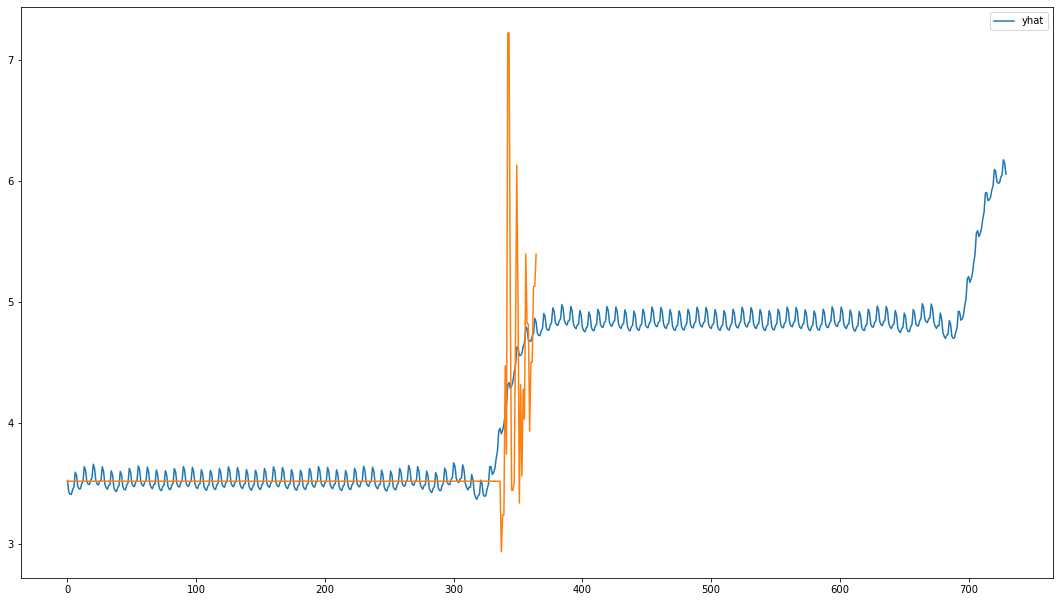

In [7]:
# Plotting the graph for forecasting of meter_id = 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7
forecast1['yhat'].plot(legend=True)
df1['y'].plot(figsize=(18.5,10.5))

In [8]:
# Fitting the fbprophet model and forecasting for the meter_id = 0x93f617649b8e56f685131892d990dc7113585071

# Extract the consumption values in a dataframe
df2 = consumption[['index', '0x93f617649b8e56f685131892d990dc7113585071']] 
df2 = pd.DataFrame(df2)
# Change the column names to 'ds' and 'y' as it is desired for fbphophet forecasting
df2.columns = ['ds', 'y']
print(df2.head())

# Defining and fitting the model
m2 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m2.fit(df2)

# Initialize a dataframe for which forecasting needs to be done
future2 = m2.make_future_dataframe(periods=365)
print(future2.tail())

forecast2 = m2.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds       y
0  2017-01-01  11.712
1  2017-01-02  11.712
2  2017-01-03  11.712
3  2017-01-04  11.712
4  2017-01-05  11.712
            ds
725 2018-12-27
726 2018-12-28
727 2018-12-29
728 2018-12-30
729 2018-12-31
            ds       yhat  yhat_lower  yhat_upper
0   2017-01-01  12.170883    9.179928   15.183590
1   2017-01-02  11.258096    8.186655   14.345699
2   2017-01-03  11.027357    7.885628   13.990978
3   2017-01-04  11.069206    7.837791   13.972829
4   2017-01-05  11.587854    8.646614   14.592427
..         ...        ...         ...         ...
725 2018-12-27  16.648776   13.652615   19.596437
726 2018-12-28  17.045950   13.941206   20.241606
727 2018-12-29  17.238646   14.295844   20.310210
728 2018-12-30  17.596590   14.460770   20.550288
729 2018-12-31  16.694788   13.770351   19.783479

[730 rows x 4 columns]


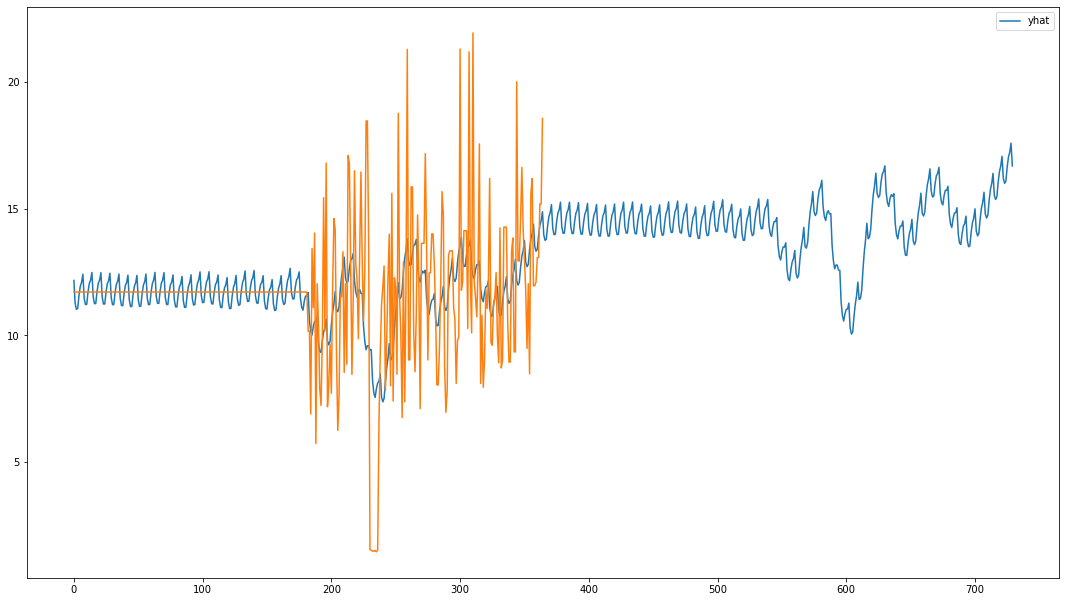

In [9]:
# Plotting the graph for forecasting of meter_id = 0x93f617649b8e56f685131892d990dc7113585071
forecast2['yhat'].plot(legend=True)
df2['y'].plot(figsize=(18.5,10.5))

In [10]:
# Fitting the fbprophet model and forecasting for the meter_id = 0x47218b46abb2fcaade487a211911406dc6e13730

# Extract the consumption values in a dataframe
df3 = consumption[['index', '0x47218b46abb2fcaade487a211911406dc6e13730']] 
df3 = pd.DataFrame(df3)
# Change the column names to 'ds' and 'y' as it is desired for fbphophet forecasting
df3.columns = ['ds', 'y']
print(df3.head())

# Defining and fitting the model
m3 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m3.fit(df3)

# Initialize a dataframe for which forecasting needs to be done
future3 = m3.make_future_dataframe(periods=365)
print(future3.tail())

forecast3 = m3.predict(future3)
print(forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds       y
0  2017-01-01  23.965
1  2017-01-02  28.689
2  2017-01-03  27.664
3  2017-01-04  29.229
4  2017-01-05  29.548
            ds
725 2018-12-27
726 2018-12-28
727 2018-12-29
728 2018-12-30
729 2018-12-31
            ds       yhat  yhat_lower  yhat_upper
0   2017-01-01  26.378349   22.678258   29.943738
1   2017-01-02  26.712151   23.017188   30.404843
2   2017-01-03  26.884573   23.130600   30.511233
3   2017-01-04  27.380420   23.626893   31.056904
4   2017-01-05  26.934467   23.297307   30.664445
..         ...        ...         ...         ...
725 2018-12-27  23.828089   19.924801   27.596805
726 2018-12-28  23.395246   19.685015   27.237473
727 2018-12-29  23.045844   19.367088   26.538931
728 2018-12-30  23.021173   19.289942   26.922182
729 2018-12-31  23.277334   19.807481   27.023872

[730 rows x 4 columns]


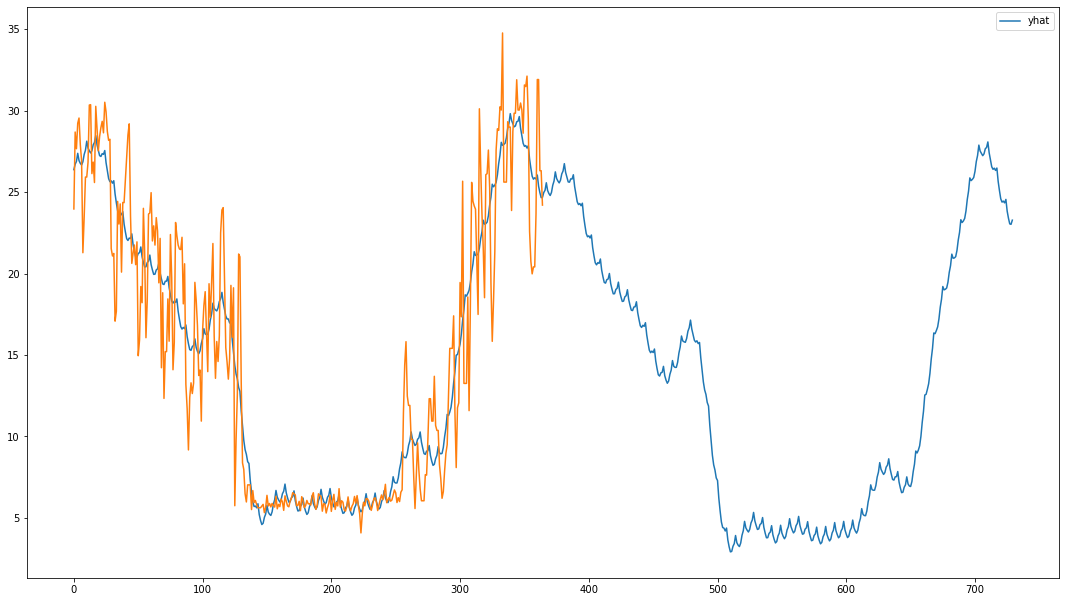

In [11]:
# Plotting the graph for forecasting of meter_id = 0x47218b46abb2fcaade487a211911406dc6e13730
forecast3['yhat'].plot(legend=True)
df3['y'].plot(figsize=(18.5,10.5))

### Energy consumption prediction for all 3248 households:

In [5]:
# Initialize a dataframe for storing the prediction values.
prediction = pd.DataFrame()
prediction

Empty DataFrame
Columns: []
Index: []

In [6]:
# Defining model for every household, fitting the model, forecasting, and storing predictions

for (columnName, columnData) in consumption.iteritems():
    if columnName == 'index':
        continue
    meter_id = columnName
    print('Meter: ', meter_id)
    df = consumption[['index', meter_id]]
    df = pd.DataFrame(df)
    df.columns = ['ds', 'y']
    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    try: 
        m.fit(df)
    except:
        prediction['ds'] = forecast['ds']
        prediction[meter_id] = consumption[meter_id]
        continue
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    prediction['ds'] = forecast['ds']
    prediction[meter_id] = forecast['yhat']
    print(prediction.shape)

Meter:  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(730, 2)
Meter:  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da
(730, 3)
Meter:  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f
(730, 4)
Meter:  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407
(730, 5)
Meter:  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f
(730, 6)
Meter:  0x263b7a6969c175823ea1fba2983668fa5f640ab4
(730, 7)
Meter:  0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79
(730, 8)
Meter:  0x077eb7207315025bfd8dd65f5b81f8be612b3229
(730, 9)
Meter:  0xaf8627889fff7ba6fa91bfae6b05636453d032f1
(730, 10)
Meter:  0x3b7466451863d09c34673c4dfe45391d56e0cb23
(730, 11)
Meter:  0xb1bd18b68569dd962497a9802036e536c10cc6a4
(730, 12)
Meter:  0xc0ae15ea749069eb610952a8b9dae0afaa4e7e3e
(730, 13)
Meter:  0xdaaa7ff89654c1b4cf2cfc48f7e82f2789228b91
(730, 14)
Meter:  0x2a7b4bac42d193820c172ad07f41aac9de94bb62
(730, 15)
Meter:  0x761df95c32b60b85eb661847be7cbab29bd02987
(730, 16)
Meter:  0xf51f50b28734e81f32cdcc19a5ce0fb71fa5ef33
(730, 17)
Meter:  0xb64ea6716e4721372c7d27c5ee60d374b26d5f89
(730, 18)
Meter:  0x7aed4c56e5c7

(730, 136)
Meter:  0x69f3d57dddf7690d80d0648847d7eec35a9410b4
(730, 137)
Meter:  0xdc36ec8f072fd90f49971421d9fef5d09ca7182c
(730, 138)
Meter:  0xe3f1326b535fddf3d563e58a9ea83190c232e36a
(730, 139)
Meter:  0x2320f0f9c9ef1df92035b2cd14714bdebc7d2f11
(730, 140)
Meter:  0x771166c050e6923c6a833a364bc3aed356d8a858
(730, 141)
Meter:  0x45f619233b5c9524a6b2fb2dd330871221d7e429
(730, 142)
Meter:  0xac8e5738678eedcbd20621a6fd7f3e2429fd32f0
(730, 143)
Meter:  0x10004081106012837e4a1d6b5e1f39c97cdebe8d
(730, 144)
Meter:  0xf3aa8b72cf5e8b7c21230088c9f2cd820b7ad963
(730, 145)
Meter:  0x09000b3bdbe964e44dccab42348acd867b4bba11
(730, 146)
Meter:  0x7e76592b070d31e11718dc3e89028e9a9d0b5c55
(730, 147)
Meter:  0x90a4048227ca923438ee8b7c11782b7da45e5506
(730, 148)
Meter:  0x81059916e32c06a013cb3ed64935a102b07e84f8
(730, 149)
Meter:  0xb8a7b8caa2d3d14cddc317fad74bd5ab61a25ce7
(730, 150)
Meter:  0xc00a97db92f213afd6224f74f0d087edfd6800aa
(730, 151)
Meter:  0xe37b4539f0c0264fd76ba57e2a82f59154b0a2b9
(730, 15

(730, 269)
Meter:  0xcef1339809f6ffe0984ccf5f1327eaa6e1c0d1aa
(730, 270)
Meter:  0x2eaecb6a538e6e6963be15a37a3685069f3e6056
(730, 271)
Meter:  0x30d9702e4e32fc1a1e2739476846aba3fb77311c
(730, 272)
Meter:  0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20
(730, 273)
Meter:  0x4cfb2caec4339a3377d2915f1866d7a1bc9afa0d
(730, 274)
Meter:  0x081eaf815a60b813eba8461527a754de6117cb0a
(730, 275)
Meter:  0x29c2d8b2a1e785e531bca7c4f2da56cb267b0a0d
(730, 276)
Meter:  0x5504a2cdc87308ff9c04c0a4e6bccb7fbfeaf3b1
(730, 277)
Meter:  0x62f93446b0b087505f9b2027c28f00e208b78215
(730, 278)
Meter:  0x04a0d9ea035722393574803ae4eec132a25bf736
(730, 279)
Meter:  0xb5a50cf91965661e1f98a2eec576e1471dbf8ef6
(730, 280)
Meter:  0x32db40afa1c7577ecd18bf1cb059ea217863935a
(730, 281)
Meter:  0xcd849a58376fd6f786286a497c7352b9f3070b6d
(730, 282)
Meter:  0x00fdcb3091a9ef16dc7d6730f591bc566fa4c6f5
(730, 283)
Meter:  0x83102d951f508e0fb9325d5d342371507761d011
(730, 284)
Meter:  0x111695d1fc73a11d1675f8cff9c74b5a6819c5ba
(730, 28

(730, 402)
Meter:  0xc5e7f2893b6888daf39f80a052154ca4f5ba5c71
(730, 403)
Meter:  0x62f400d7c25c77ef4bcfb3451257cbaa8ac38143
(730, 404)
Meter:  0x83d388211a8e897daff9f36d098986a65ee1286f
(730, 405)
Meter:  0x8b7c2c75a4020b6c3449e8071883f2eecec33fa5
(730, 406)
Meter:  0xd074abaf87d81324647ee5ab47c6070c83aafbd9
(730, 407)
Meter:  0x244d4f3f6745a69d086c9902dd9343512cbd2cb6
(730, 408)
Meter:  0xcda57ba2bb93e047f3270f8a9f493f46335051dd
(730, 409)
Meter:  0xbf3af55ae765c470837edf0e338e17811e9bd309
(730, 410)
Meter:  0xd7acb0c3d4179cbd63b7d23bc96987a49ed2a573
(730, 411)
Meter:  0x9302e6536f782b9f71a99826d25c44830c295446
(730, 412)
Meter:  0x3fe39ac1ec8aaea90fc592af50d3b7b9f6b20597
(730, 413)
Meter:  0x290875a4afdfe8b22101e8ed725d49bd381802c6
(730, 414)
Meter:  0x1457ae2c0796093977e10c95eeb1d410505e421a
(730, 415)
Meter:  0x968e84028d8123b426594ae4025cab2902af3cc6
(730, 416)
Meter:  0xcc95f9fe895ba5b4422d47f4f050e138a2d031ab
(730, 417)
Meter:  0x9d6ded1881b16605bbc2e4aa3cdbdd1304b6ed98
(730, 41

(730, 535)
Meter:  0xf35f237ed99b6b0b4dc1ab5da1cfc910cdccf118
(730, 536)
Meter:  0x075e6d453b1ea3c11ed88d385812be44e02e6dbe
(730, 537)
Meter:  0xe7e7bbd32005498069fd127e3cc613d65270e8d3
(730, 538)
Meter:  0x67deb7ef715fdeeb4a949f6d6b7c823fd32520cc
(730, 539)
Meter:  0x192e768be863ff5b5f58b9bc786c2839da24000f
(730, 540)
Meter:  0x555a073acaf8f82474962852a423578083b68eef
(730, 541)
Meter:  0x24d674f9da93ac7829ac4cd3e5c7cabeb1776d1e
(730, 542)
Meter:  0x26531106f6290b478e98ed2c7fa7b90f6768c694
(730, 543)
Meter:  0x99c6ba65bec5c1e83f8c19f6518178c87732c406
(730, 544)
Meter:  0x3aca0a5c8e864ba4d692d4b916e7a99cb06f682d
(730, 545)
Meter:  0xdf8e3afd04cbfbce6744ef3099294c556f3b5490
(730, 546)
Meter:  0x5398b5255ad3b09115538e796eab0eb8cd21d706
(730, 547)
Meter:  0xf6e94f4f524a383c7cb7b8a4c7518fbf2ffd9e60
(730, 548)
Meter:  0xdd178642f06417ba14f12f5aae566fa67a498c1a
(730, 549)
Meter:  0x7f97d411159354c5f3d6ea6795c8ebe5f52fdab5
(730, 550)
Meter:  0x2949aafcd2efa12be7fbd8bdfa948c34a972ed1f
(730, 55

(730, 668)
Meter:  0xeac9d28f463bd9d387ea1a11b542ec29dc51df64
(730, 669)
Meter:  0x2e0e49d2669315d2095065b51675e5b95e74b481
(730, 670)
Meter:  0xd36b626d7dfcb8f329e0d98d477eed25366282d8
(730, 671)
Meter:  0x30e0a93ec02c0b77bdab0e159b7281e2fbc3d935
(730, 672)
Meter:  0xf20daf3cc250f8c86e3e78409dd09711b3b16e81
(730, 673)
Meter:  0x0539ff9229c05e9a58e00eca098f32c6d893b081
(730, 674)
Meter:  0xfd5448142aae4c664541375aee733067642b5c58
(730, 675)
Meter:  0x65386355ee5ba1420ded59cedb84704e401e26ae
(730, 676)
Meter:  0x11623e686cd05f6e4f692582d074ec4d3ca54fe4
(730, 677)
Meter:  0x6e54f6cd327a645126108c5cc8c3d520bfee51c5
(730, 678)
Meter:  0xda45fa7f126b600f26b22dd9f56cbf90000e29f2
(730, 679)
Meter:  0x90e68c2c6d790d011721ea21b039392519003f30
(730, 680)
Meter:  0x1652769ae1b09fb246722884a2888c3bcb4fb932
(730, 681)
Meter:  0x9513497cdb4f8e05a5b6f606a2f1562a5cc1cf8a
(730, 682)
Meter:  0x905776aea2df466bf6b432afb1e6b8093fb4c58f
(730, 683)
Meter:  0xa2d7d62ffc38a1b03994e860136e623fef3f9f7b
(730, 68

(730, 801)
Meter:  0xd5e51e233986c1e80d1839d1c68424c21de3b3fc
(730, 802)
Meter:  0x48a611229a858553e115d709f4a22032bff0cd68
(730, 803)
Meter:  0x60327e7dddb840ceb9ceadef3cf26dcb9b73ebf5
(730, 804)
Meter:  0x2f85db133616eb1c883de2b865470aacba010251
(730, 805)
Meter:  0x8a7da43eb89dff963f22d25d9be014b1a556b743
(730, 806)
Meter:  0x0e315e710f4a7508399b1f049e24db730e7ea427
(730, 807)
Meter:  0xf4c1174e5c71b3e41ed84918069cb339c7eea3de
(730, 808)
Meter:  0xd1663c6e42201a1d51dfa57c3ca827d09daba817
(730, 809)
Meter:  0x07500ea066a7bb9d3e8a36913c4c224c2e1bf903
(730, 810)
Meter:  0x3bd0c55b4963c5dfac1343b6221e6a9a74db6167
(730, 811)
Meter:  0x469835a27ff40c0ac0cd7f0411d59574b88a17e3
(730, 812)
Meter:  0x6ed7f570d70963dc58002ac325433c7952eed161
(730, 813)
Meter:  0xf3b8b4cb7bf25663b15d70152b9334118a100055
(730, 814)
Meter:  0x8f04b8efaa48f13810f51e4b361961226d718ef1
(730, 815)
Meter:  0x6f58fdf112e50ef59d03ef290fd77931de18cd3e
(730, 816)
Meter:  0xe190e49075d4e003456fe443073730eb31357516
(730, 81

(730, 934)
Meter:  0x1c64eb22c53aaf2d3d437a317f24b00001669dbf
(730, 935)
Meter:  0xb042f697cc1c9a11d42481929a51f9d35c822842
(730, 936)
Meter:  0x6491150546f229553d71eb5bdf18e78725496303
(730, 937)
Meter:  0x7a1ee474c8bfc8264e27037cead840b44522ff13
(730, 938)
Meter:  0xd98c0b94abe056d915d1aa9d94dde3dd59612d84
(730, 939)
Meter:  0x848955e829b78a32451d72065a90961a0bb81fee
(730, 940)
Meter:  0x81fb248162f2d61eb9e6ed2333bca74f8c4aeeb4
(730, 941)
Meter:  0xf8ac9632ba03ac7b14133bd7427cf98b3647cd85
(730, 942)
Meter:  0x3e9d510e31e937ca13e199d4edc8711b80d9f72d
(730, 943)
Meter:  0xcfb5b94f79f9ad207b423e6f63243c4f72e91f34
(730, 944)
Meter:  0xeec58baef0143b90c7290ecca2ffa8a9f3e59c09
(730, 945)
Meter:  0xa3a6d341ca5a296cf03a2bc07b7696d8a8f77395
(730, 946)
Meter:  0x907822edab89bcc36ece327dfc05d13e2d817cd0
(730, 947)
Meter:  0x51fca622da57e4f01e8e742aba3318ae21365dcf
(730, 948)
Meter:  0x8af6a4d9bf889f310b897dddfac2d669b945c548
(730, 949)
Meter:  0x084c9fdce03f8440bfd211230aff08d028d84c0c
(730, 95

(730, 1066)
Meter:  0x74fb3bba4fc9a896d2b8c6c13f705672ecb80c45
(730, 1067)
Meter:  0x65dcdd74c70b5e4409d5a4d686e428d8472406df
(730, 1068)
Meter:  0x294e56ccc678f52bac870c1216077f494db254b6
(730, 1069)
Meter:  0x96d44bf20be33bb631da27c53fc62602655b1544
(730, 1070)
Meter:  0xb54bf315f04523ba7029532ace6bdd952cec3154
(730, 1071)
Meter:  0x09da1413da6864bebe26229089b0e7cfe39fbad9
(730, 1072)
Meter:  0x2ba0e5f8d08b7171d5ad40cf520248d60874143d
(730, 1073)
Meter:  0xedf5f4cd0bbdf70fc372868bcb1e9a971341729d
(730, 1074)
Meter:  0xcf250b4bbe9551ea6dcb8c6992a018e537a92bcb
(730, 1075)
Meter:  0x847e2a3cf8d0d01c4dc9142950ef7ae30955d202
(730, 1076)
Meter:  0x87c7335884b4495e1bd14e6d28b6325313fd9661
(730, 1077)
Meter:  0x475ed69e4b21cbcf24e2848451b9d09c84b67e25
(730, 1078)
Meter:  0x40bd1992f3159c551764e1f0fd74b85842e8e936
(730, 1079)
Meter:  0xb3ab6e346b912604eab3e49890ccb9660ca50d0e
(730, 1080)
Meter:  0xe1187c6b87e82f798c12092bf0a4326c4cacc9a5
(730, 1081)
Meter:  0x089ac0acc696fdc48aa36ba0c6b416aa3

(730, 1197)
Meter:  0xae3e7aea5bf98fdc25e9d334143050a9c2043767
(730, 1198)
Meter:  0xa598ff9ba1627e5a292fd18b029f55713666fc24
(730, 1199)
Meter:  0xb5c430ec882640cd31b7642f94988cab3b106239
(730, 1200)
Meter:  0x1bac1a886a4d9124388d1115928646b38af17a92
(730, 1201)
Meter:  0xa1a2653621c2c0f77d44627e86b55653131e7b58
(730, 1202)
Meter:  0x386d99e5eff4b966c1c0d01dc88f41da3c5ebe22
(730, 1203)
Meter:  0x454cd2e830f959b2366826eeec44c9b14732d32b
(730, 1204)
Meter:  0x8d53d4a86bca1ea4a6b3c03b5f3c6259770d6c3b
(730, 1205)
Meter:  0x7439e1854c15a7e84fbf0edd9c44c60612e8cbfd
(730, 1206)
Meter:  0xc6bc7f1e57803a6f4c76edf9cffbc6ce56956af6
(730, 1207)
Meter:  0x1a5fe7a9cecb0582d545cfd03093d2ebb95e76dc
(730, 1208)
Meter:  0x6ecea17d21c40b03b62cd2654480715be2df167e
(730, 1209)
Meter:  0x1e7ba4900a9b5491443844ed87eaf92a5dc3cba2
(730, 1210)
Meter:  0x081555da214182ccdc1b573c02994eeac835e304
(730, 1211)
Meter:  0x6a90e92d17c714140a0b09db2eaf3234cd66c01c
(730, 1212)
Meter:  0x14b2a86864a622c8a36709e4110048973

(730, 1328)
Meter:  0x6e4b0816b0c814f3f43a987079224f6fa1a7acd9
(730, 1329)
Meter:  0xa3e8673f6d89f24e4543dae6631efa2c599fd0f5
(730, 1330)
Meter:  0xfa73bf6aa0aae059b6bb2737cd3633e3ca877f72
(730, 1331)
Meter:  0xf78dbfc92f7fecb9c65c2d81d25aea9dad07af21
(730, 1332)
Meter:  0x2401952568505a9c481e9deebcc666950f0b61c3
(730, 1333)
Meter:  0x6e39109c7514e2f6442b7a222d32809da241a8f6
(730, 1334)
Meter:  0x8f91daba59cf8cb2196d0260a077b304c55847f1
(730, 1335)
Meter:  0xc70e412c24b213c2bf4046a3eacb3805fbc91a6c
(730, 1336)
Meter:  0x78db3746514a97a34f0962454d645061d6ee1e37
(730, 1337)
Meter:  0x200778e1b4dc6a5cbd400d1725f1ea8776e84cfe
(730, 1338)
Meter:  0x6a8e6daac7235311bf6fc4daa74d746559e6163f
(730, 1339)
Meter:  0x7d87d8c1e6097c5bce065471a6f7b1359914172f
(730, 1340)
Meter:  0x51ef7fae58521a051eedd62bc815e15cd74f71b4
(730, 1341)
Meter:  0xba9b6cd743b9d75d7a4f320866fe80f4544ffaaa
(730, 1342)
Meter:  0x0e60296d3b272ce3722c2d41e4020c9e5b7483bb
(730, 1343)
Meter:  0x95fc7e54336e87feed25423b86d9ea92e

(730, 1459)
Meter:  0x523ccd913d5db2c094cad51d5daf3625cd1e7379
(730, 1460)
Meter:  0x192dbca7c293adf02c0581a70fbf0f52b8842890
(730, 1461)
Meter:  0x06991c60d4b9e0d83e54774cf08d5ef17d08cc09
(730, 1462)
Meter:  0x646419ff0ce2320fa036ede18116dc3561d39bad
(730, 1463)
Meter:  0x4f9f4db2f582e33ab9ab06f671c0ecce5cda9a4c
(730, 1464)
Meter:  0x58e4520ea422c122d0b4dacf5b626008ef82ce4b
(730, 1465)
Meter:  0xd84e2169ff2a9789b08e8abc3e43f11189ef3e44
(730, 1466)
Meter:  0x77f1535070f931bbc9215c7c6aed88c9e277d5f3
(730, 1467)
Meter:  0x11667f1a23935ac1561cf3c3b0bfe7d6c8316199
(730, 1468)
Meter:  0x70233f31bfc1835a5b1466994e2f96070f905ff8
(730, 1469)
Meter:  0x776e1cd52726cdb1aea4b7dea403ef3a707d1a1f
(730, 1470)
Meter:  0xc2332ec30254630bb811613b841f6462e4137bd7
(730, 1471)
Meter:  0x2601d634b39f6e7fe465631476ebf69a7604a280
(730, 1472)
Meter:  0xde267fc7b038e818cd95b4df33d2cb618a21b350
(730, 1473)
Meter:  0x30527d3f5c855b3af840f5a94385e5f9fe67e1d8
(730, 1474)
Meter:  0x0e0e0c509d31361fe0904f13fbe90ec8e

(730, 1590)
Meter:  0x82ffc7c584d9ae10b3908d29b08e8d2a20e114f5
(730, 1591)
Meter:  0x154b54e0b885a9bbfa3d1fac7f6be2c34732ecda
(730, 1592)
Meter:  0xc8bd94d1a0eef1421bb96b0606134c71054e6d65
(730, 1593)
Meter:  0x6f09ad3f4cabe53e98567cc189b1711dfe651d81
(730, 1594)
Meter:  0x32262665131af29374d6ae391b6d74e97b1ea4d1
(730, 1595)
Meter:  0x21e2d3d2062ee551c3a3733a85564dff769bf85a
(730, 1596)
Meter:  0x2199597a9131f42409454bc792a4a43dc4f99aa9
(730, 1597)
Meter:  0xf0addcdd2c402d4a2f8a7a7a95c7d246d1c59b63
(730, 1598)
Meter:  0xd898dfb06762c131d9a7974923cca6365062256c
(730, 1599)
Meter:  0xf90d4fd519867ab6c41a6296b21b0006a658a37a
(730, 1600)
Meter:  0x22a8c096010e49d9d31ab9135a6251bab8780810
(730, 1601)
Meter:  0x391e6c2169c27de797ccbdf2d623365da28a6d3d
(730, 1602)
Meter:  0x4087024cf4d7e82726aea68dba95db973770fed3
(730, 1603)
Meter:  0x00c4c38cc020ab9e2661c947ac2dbb2a01ab6f37
(730, 1604)
Meter:  0xae3ee63a50f122b13c59640be8539f70b98df0a9
(730, 1605)
Meter:  0x0c0c1606552f67e350242cd64a8daedac

(730, 1721)
Meter:  0x7ed867730fe6943ab9ff304e24c4852467fff749
(730, 1722)
Meter:  0xb5d5cdea81c72be7a96cafea3a1f9eeedf629ee9
(730, 1723)
Meter:  0xe0376ad30e00c3cc61e3c99935c0326c7370be20
(730, 1724)
Meter:  0x54e2ec0a406b5643f95a6bfc447cdc07272ae194
(730, 1725)
Meter:  0xe9dde6f1219ecdfaa758a674c2a8e443990eb55e
(730, 1726)
Meter:  0x55fb5497e79bb07d6a3f3a6ff192c6fe5b13a012
(730, 1727)
Meter:  0x61fd9c05ea77b2382e46320dbe57dbf51b893588
(730, 1728)
Meter:  0x83a45d14375a6edbef47351f9e75bf1a18091ba0
(730, 1729)
Meter:  0x522622407fb8a927c2fecc11ada92c8593a865e1
(730, 1730)
Meter:  0x29ced77f4486c496b1a2f5a0274d0f4ee1d3d95b
(730, 1731)
Meter:  0x5b2556931c0db5f65d389f085910c78816e9a6dd
(730, 1732)
Meter:  0x7cd15573fab3ec573bf0eddfdb3da489189ac728
(730, 1733)
Meter:  0xde9847688b2a16eb8b18a99e8a84a0f626654679
(730, 1734)
Meter:  0x5ab18f34712f5af73d52a34b64aa1c36e3114bc9
(730, 1735)
Meter:  0x2f58e8c56bfaf07561dd877c1bc2fb95d0c0338d
(730, 1736)
Meter:  0xcb46899f3bae1375d439ee53ff0925f68

(730, 1852)
Meter:  0x8408a953f6ccb75bd8487ecf02f090f57f12ca98
(730, 1853)
Meter:  0x65f32e4da0e3c93a6858d826408cd8d2cba7b5c3
(730, 1854)
Meter:  0x1613c5665fe0346203212b85b5de5ff4506e080b
(730, 1855)
Meter:  0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41
(730, 1856)
Meter:  0x33a66249845e58e3cd93f2604a7aebce89eb0d40
(730, 1857)
Meter:  0x8edbb4daa28d771b31dfa6cb5365e236d7432e8f
(730, 1858)
Meter:  0xf24069046603a770f280bffa6d2fce78bbe47ebe
(730, 1859)
Meter:  0x8e26793a52a6295edf56a5e3155dd41b9434584e
(730, 1860)
Meter:  0x43f3bb9792ba271ca56f45c169869c3d254dab7d
(730, 1861)
Meter:  0x27038f33cad5421f93da486b13917a687cd0caaf
(730, 1862)
Meter:  0x9f9d7f6373bf37525dc3b55769f3479c6cb3c4ad
(730, 1863)
Meter:  0x1bf85daad4e7818739c30b8ed9e0c49bae01b39f
(730, 1864)
Meter:  0xe56d2a7d34cb08b534f3bf5fbbf58e5fb7c25ceb
(730, 1865)
Meter:  0xd5c4eeaae76dbd139af2d8db37e840245286e03e
(730, 1866)
Meter:  0x0689003152e003b6771ca7eaf368a7d4b75cf74b
(730, 1867)
Meter:  0x76e9c0f3f4effb10fa74dec9574d860ef

(730, 1983)
Meter:  0xd4fbdfb7e32e25bd35f7ba690abbcad4c51e35f8
(730, 1984)
Meter:  0x01d5bdc4ea235ada6275f2be25c883aed05746bd
(730, 1985)
Meter:  0xdb052cb896cdc588cfbc02b23f45be9a5299d10c
(730, 1986)
Meter:  0x6addb33539160de01135eeeb22da22645e6d4135
(730, 1987)
Meter:  0x1f3be2a869cea471addff2785611670887289856
(730, 1988)
Meter:  0xbf9b556bb1918bfc2fb1fea9c0b5f37494dbdd44
(730, 1989)
Meter:  0x3d12054fd850964d9d590c59010e649fe3294043
(730, 1990)
Meter:  0xfe01067e867891b37625ff2f7d79b3581fbb0b39
(730, 1991)
Meter:  0x8cb783788d3f15df45d9f005936fc86cfd97c099
(730, 1992)
Meter:  0xa168c7b84d197dcc32586877286518e4d1186efc
(730, 1993)
Meter:  0x7a1f932906785861301af46ada8f8418859138d2
(730, 1994)
Meter:  0xd88b5cec30951073539762e5bea102fb274ff0c3
(730, 1995)
Meter:  0x25346aa1a84911ee9fcb69fb412fcaf856447408
(730, 1996)
Meter:  0xbf66b8657569b2ef11a3ff24ee3321829bab29a0
(730, 1997)
Meter:  0x10beda3bea83399af562a5c6868e489e87879d3d
(730, 1998)
Meter:  0xa5121e433198917070cb5a64c5778a6d9

(730, 2114)
Meter:  0x0af1a109f5a17bb427c28ac0e202c3ee6aac1411
(730, 2115)
Meter:  0xa372ffecd6b4c1a79abd98f886aa247a83777608
(730, 2116)
Meter:  0xb8c9b038d7bee14896e728fdbe959975334d2ebd
(730, 2117)
Meter:  0x54d5a1411d6a2d3063302b62e3cbd535fc960ca9
(730, 2118)
Meter:  0x48be6e04ee3331127b2edd4380e93fd3229fe420
(730, 2119)
Meter:  0x4f21b73dda7eae1c97e4b8015012a677e574e13e
(730, 2120)
Meter:  0xe354bd26a55f831e40b15d85beef6e795ac5fc74
(730, 2121)
Meter:  0xe3f1868cc76ac1e5e85b6695071e401253092f10
(730, 2122)
Meter:  0xdb7028e196a20817da608b54ba9d54d2ee1eb38d
(730, 2123)
Meter:  0x937f8179422ade25132806c8cea0cb3fce39ea5c
(730, 2124)
Meter:  0xe1e3fd653c38f8853173e92be7e55451164a1e5f
(730, 2125)
Meter:  0x74e2dc61322f3925bb41806d3ed1317486203245
(730, 2126)
Meter:  0x6605bfcbfb6def8482921c3e262b223541812368
(730, 2127)
Meter:  0x789f678be1aa4ee16107b8de5efc6c112cfe8815
(730, 2128)
Meter:  0x739a258ad68b8e25e6b7a74a466d8d3bbad614e7
(730, 2129)
Meter:  0x8f2fcd81af7d6d9c83e48f1e902e49d95

(730, 2245)
Meter:  0xc4f434b4835b474bad4662a6e5a17eb5378160c3
(730, 2246)
Meter:  0x2232874685dd1b33f1862df51341cc49c309d7d9
(730, 2247)
Meter:  0xd50cab5f1f6833ceeccb97d99a38837bf4660193
(730, 2248)
Meter:  0x707eedf34d0f13da713280a9e6259f3632e2d572
(730, 2249)
Meter:  0xd3b4198fc428eedaabbc76e26fa8f34eef2bf1a3
(730, 2250)
Meter:  0xe8bc864c42ae5bb6c11a6337e9e875d1e4158e1e
(730, 2251)
Meter:  0xbe03b50b0e9cbe47be665e145ecccc91c9094809
(730, 2252)
Meter:  0xa7885b83a8e3ea9506d0d6b8d55451c696e8a999
(730, 2253)
Meter:  0x318f7e17d767aeadd6c4f2e09208ee9ad4bc5613
(730, 2254)
Meter:  0x9c2767010767f6e76099868901c144906d72075a
(730, 2255)
Meter:  0x11087ee6f527a1cb47c3a2ff70a10faf8a7e0704
(730, 2256)
Meter:  0xdf8427d2384fe9ce96d05d10d19e7807c05ab3bf
(730, 2257)
Meter:  0x898e4926ca13f9440a797c4ec49d3b29540be53b
(730, 2258)
Meter:  0xd23369db28e0c168f6ae58353b47a05de76aceaa
(730, 2259)
Meter:  0x7a0626fa4ef01767593f7a777d6e81d44836927f
(730, 2260)
Meter:  0x42455cb9810a022a22120fc6a68016743

(730, 2376)
Meter:  0x691de4ecc7c288bcb1ae546d2a4d80b45445398a
(730, 2377)
Meter:  0x064ecc088bd6c9d6c4032cc1fd4764d51a0d4633
(730, 2378)
Meter:  0x15eafd3ef490de4e0e9cc96176cdd29bcdb16829
(730, 2379)
Meter:  0x5a23f91d930a7ee0948fb455f146e6c1035b4741
(730, 2380)
Meter:  0x2940b9581097fda788956e893089d06ee3630f9d
(730, 2381)
Meter:  0xb7bd7ca1b2320bcc738011c98f0402f0b232412a
(730, 2382)
Meter:  0xcda28a0c6200e2759421c8a1c3645a630e1fcd84
(730, 2383)
Meter:  0x1d1bb87600262ca58f23be73f1df8a2e051809c9
(730, 2384)
Meter:  0x561651553217d2474fae2f94462e2bacfdf965c0
(730, 2385)
Meter:  0xe5373549fd411e410eb4dc8aaf9db7328226cee2
(730, 2386)
Meter:  0x52b9b58035fd18e2aa7537ad7dbf7ba7ccb15185
(730, 2387)
Meter:  0x4c4d2c4f1f7a8e71e1af07abd82cadb2bfe71bff
(730, 2388)
Meter:  0xe438971c2caa6b44ae3468c11d7e322834377616
(730, 2389)
Meter:  0xae1500212265ac87ef6883882146b144f62491ee
(730, 2390)
Meter:  0x89902beceb1ed54170a26e1454eb5f74ea1d3f26
(730, 2391)
Meter:  0x748cad7867e108022b8692e6cf833b2e0

(730, 2507)
Meter:  0xfeb347fab01f9c6d9d4792e2c71a4d1ff124d9d3
(730, 2508)
Meter:  0x0bebb672968bf87b76353494ef4694304b9f38d7
(730, 2509)
Meter:  0xc82332c947933597613b311e35d9f2aadd744676
(730, 2510)
Meter:  0x90af67ef4112bf6f27e3665bf8807b6234f92c16
(730, 2511)
Meter:  0xbe2fd332ae57016e4e24ed3508528fba8a7d6ea7
(730, 2512)
Meter:  0x7cc8143a8b65d2422f96839008b40404914b16fe
(730, 2513)
Meter:  0x3e747f7af82dfb1219d2b8343d8d10bd0b7258d1
(730, 2514)
Meter:  0x4009c67402f4d2a703293cfb181d770097f95783
(730, 2515)
Meter:  0x6bdb521b0c0d518f3c6922802055ada8721b89b6
(730, 2516)
Meter:  0x02b365606db768788027703f9253e423e8478c88
(730, 2517)
Meter:  0x6f9b39bd98cb87c18307e50785c38505b120e141
(730, 2518)
Meter:  0xb62d5a42e84ef75d605e67f071b6866cabfdede6
(730, 2519)
Meter:  0x0a131aa30d6ffc75e99f1efe3ef27ab3a2172055
(730, 2520)
Meter:  0x639e7d89cb979c00698323c1ff74f1a00915bddd
(730, 2521)
Meter:  0xba9f2e77328de620d89908f83108d6f891336e7c
(730, 2522)
Meter:  0x66e6b8402fd0c3ebe728349f02e4458a5

(730, 2638)
Meter:  0xf7f9a4f0835166b336d228c3cdc01d38664035db
(730, 2639)
Meter:  0x0b7425edcb42ffa287e5fe5a38cd9d2216878b20
(730, 2640)
Meter:  0x5184cb23f3b66ca4804e219dda496c6f936fbadc
(730, 2641)
Meter:  0x01842e2ab2e8c1497d71fa2257a9ecb92cc9a64b
(730, 2642)
Meter:  0x67dbdcb2a2401b32ec8c3494aabbd1446209605f
(730, 2643)
Meter:  0x5e38e74c0bb5a70dfd4cdfb99f9daaf94e3c2176
(730, 2644)
Meter:  0xb061fbc2e6d5e97cdfcaa480c4323522ea4b8d35
(730, 2645)
Meter:  0x6ade1b27fc74e7ef59249a95eb309711f5278c58
(730, 2646)
Meter:  0xca3c8701ab3321c91edba1b8c07b370296119aca
(730, 2647)
Meter:  0x4efcb0ff8457cbeb0ee8da876138fe519872e496
(730, 2648)
Meter:  0xfb1b12b0d94864ae2fcd1fe5ee6222921a32bacb
(730, 2649)
Meter:  0xb5a8b186b4f8ed81f4ad88c5c8f35e9925873dc6
(730, 2650)
Meter:  0xbf31533b98efffb9e438afeace56262fe8ab15e6
(730, 2651)
Meter:  0xaa1d9aeea97bd4ce7af794304b07659aa867fc99
(730, 2652)
Meter:  0x803507f6852c7ab811a888efb6be0bb37ed6be97
(730, 2653)
Meter:  0x2a6963332d90314c0b02b33f69e29a80f

(730, 2769)
Meter:  0xc3a1662a8dafb796ef9e25aed9983e9fec98aae3
(730, 2770)
Meter:  0x92bd96aefc7cf3043cb7372e83991cbf2e401110
(730, 2771)
Meter:  0x30dd170d965df9834d9ec4fc341ac313de01633c
(730, 2772)
Meter:  0x281e0b3dc7f1bbac09857a94ab1d56effc8832b5
(730, 2773)
Meter:  0x3a1b35b96a6b88a738ce013979de68ae9a74cc6e
(730, 2774)
Meter:  0xa811e9dad200ff61a563e05b1fdd6a1c2df9717a
(730, 2775)
Meter:  0x4806b37e663a31df67b789d61ccaeb095d7ca437
(730, 2776)
Meter:  0x70ec6e59da73a8f1b9b04e66eb8ba9f3e6847bee
(730, 2777)
Meter:  0x154c9295c323aa47fa92539cdb5cf4fd21989923
(730, 2778)
Meter:  0xbd23603c920c18d16b50e55b2d9f92a2b2b33cf3
(730, 2779)
Meter:  0xf88783bcb92775660d017195d457696c1810596d
(730, 2780)
Meter:  0x89d06e1e9ab7cfc818b270bb618a1183084532c9
(730, 2781)
Meter:  0x2251a5cbfc639369404b3ccba56607cc235786b9
(730, 2782)
Meter:  0x94ace0372c45642d17b6aad6f5057b919bcdfe4c
(730, 2783)
Meter:  0x5ff5508546e67350a0d80e3e93d05248956bfd90
(730, 2784)
Meter:  0xbe3a9051e2847e11dca0418f87e71812b

(730, 2900)
Meter:  0xaa77abf8ac7b8b81431b4290c1989a5f204e6338
(730, 2901)
Meter:  0xca236717054276038d32c7f0252f8df8b339255d
(730, 2902)
Meter:  0xd061cc3632b54c63486d113627f60c218c6ad46a
(730, 2903)
Meter:  0x0b63b94bca5d809e4953bbb6872977678fd102c3
(730, 2904)
Meter:  0xa586cf7ad09e3d28513464e414e9eb49281b9884
(730, 2905)
Meter:  0x02a700cee0fc52aa0c3bcba232a054db24a158bc
(730, 2906)
Meter:  0x9c47508d1313339491b2e68db81125d27fd7876d
(730, 2907)
Meter:  0x341d72fdac8f3ff634c5ca0e1b773dd6ec1ff4de
(730, 2908)
Meter:  0x843fed762825bfdc1f8f07349d425fd5c7b4cd1e
(730, 2909)
Meter:  0x5310fcc5e0bed474fa56831059de1f596cdfa798
(730, 2910)
Meter:  0xb5ed99e0f9684fda0d207a3e873637fc07dce715
(730, 2911)
Meter:  0x5a928628e5ce220b1a144ff6ef4aefc88e1097ce
(730, 2912)
Meter:  0xcaa1cfe50c4c2704ef8cd42f9e48b826024dc5a4
(730, 2913)
Meter:  0x65c4890d9124ca2ce4fc2b3d448d3b86c02d4e19
(730, 2914)
Meter:  0x11f74a09e255947fe206e24651ec651a662316b6
(730, 2915)
Meter:  0x222364e42b760dca5f87f9e33febf2d00

(730, 3031)
Meter:  0xf45d8676cd6ced2e25a20ec3b67a357c0b874c60
(730, 3032)
Meter:  0x7785332591bfbea249e7ae0d66c554f96d7dd4b3
(730, 3033)
Meter:  0x2b7065dffaa1c1af047c0136cf25a6f5c739ed92
(730, 3034)
Meter:  0xaf7e0185ee694f20f68e302f159212b2325c4aed
(730, 3035)
Meter:  0x99384393668362b4a2f88318571dc36d4c28a15d
(730, 3036)
Meter:  0x69a24ae3b7bbc428e8cc1163655ab8eadcab12a2
(730, 3037)
Meter:  0x5c6d1ebc854a9e6ca552bed0ac2a3f5a51733586
(730, 3038)
Meter:  0xe68223c74085c3d697cf5f4ec20c558d989940fa
(730, 3039)
Meter:  0xa1c221eef4a88e95fb58a02a51e175dc0d10b8b3
(730, 3040)
Meter:  0xaf18ff9bed90263b32b50a9c919c5f4d453f2f94
(730, 3041)
Meter:  0x920605ae7900448e12ab741876e3a97462d7ed0c
(730, 3042)
Meter:  0x88a4939163bb2d3b8562e6634f6a0d62dfad1e64
(730, 3043)
Meter:  0x2f339bca38c727f1211d3b6fd46cf6c8f2cef187
(730, 3044)
Meter:  0x53651b34abab5fd114f46f9da80fd70c63bf9b96
(730, 3045)
Meter:  0x92de68bf2f1335c4481687596c4445b14cba9759
(730, 3046)
Meter:  0x46dae2eead7af80bd0f4ee735ce99962c

(730, 3162)
Meter:  0xfe46c895faa14f8756d249c89a2898ea55c2a32d
(730, 3163)
Meter:  0x5ed384788bc46ff5840e72c4ce8340c3486eb942
(730, 3164)
Meter:  0x2125bd0602ac000bfd08956b4a51f337da598935
(730, 3165)
Meter:  0xe3a0fd219b5285a4a0b1e296c8b08563ea06f527
(730, 3166)
Meter:  0x60707e6c0ed692d90e57162732d8dea5a129f5e8
(730, 3167)
Meter:  0xf2fce5f42ae60a714968274148ba6b06add51d51
(730, 3168)
Meter:  0xea80f91f749dc12ba75eb77e024b20c8ea36603b
(730, 3169)
Meter:  0x657ab7e1fc19a09ce2dd62260dcb43f4b50358b9
(730, 3170)
Meter:  0xe2b62f7298d394db9ddcce9b25a8017d47879137
(730, 3171)
Meter:  0xcd8c5aeceaa685c774353d6b8a50a519fafed217
(730, 3172)
Meter:  0x3a6da449738632a0ff1de1898c6f864f0051e6ed
(730, 3173)
Meter:  0xa1031af265cdca3baecd7f7a00da4518819c3cd2
(730, 3174)
Meter:  0xf65842b7c9aa5dbbcdf7c2382478cc5f5349ee36
(730, 3175)
Meter:  0x730c76974a3b171805e1fd9cc73e45365e95badb
(730, 3176)
Meter:  0x7b740b5520548ab7815d96c0b30c04ec0f1203dd
(730, 3177)
Meter:  0xb9661da16b172f29388ad962523d41b79

In [7]:
prediction

ds  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
0   2017-01-01                                    3.523238   
1   2017-01-02                                    3.428345   
2   2017-01-03                                    3.409145   
3   2017-01-04                                    3.407886   
4   2017-01-05                                    3.449216   
..         ...                                         ...   
725 2018-12-27                                    6.030124   
726 2018-12-28                                    6.050364   
727 2018-12-29                                    6.175300   
728 2018-12-30                                    6.149666   
729 2018-12-31                                    6.055185   

     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
0                                     19.054038   
1                                     18.809276   
2                                     18.491938   
3                                     18.334882   
4                                     18.182300   
..                                          ...   
725                                   12.512994   
726                                   12.074552   
727                                   11.786903   
728                                   11.361667   
729                                   11.058256   

     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
0                                     16.918439   
1                                     16.913567   
2                                     16.933200   
3                                     16.722195   
4                                     16.541069   
..                                          ...   
725                                    3.920075   
726                                    3.782820   
727                                    3.518956   
728                                    3.179413   
729                                    3.155121   

     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
0                                     14.531002   
1                                     14.520028   
2                                     14.386096   
3                                     14.218391   
4                                     14.021504   
..                                          ...   
725                                   17.369412   
726                                   17.049155   
727                                   16.716802   
728                                   16.348626   
729                                   16.288742   

     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
0                                     31.781509   
1                                     31.659684   
2                                     30.817060   
3                                     30.644136   
4                                     30.174322   
..                                          ...   
725                                   16.489526   
726                                   16.406232   
727                                   15.732647   
728                                   13.698099   
729                                   13.414093   

     0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
0                                     20.809948   
1                                     20.636178   
2                                     20.396130   
3                                     20.335204   
4                                     20.291426   
..                                          ...   
725                                   13.925841   
726                                   13.938015   
727                                   14.016789   
728                                   13.555133   
729                                   13.334917   

     0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79  \
0                                      0.739318   
1                                      0.804962   
2                                      0.923807  

In [11]:
# Changing the index to date
prediction.set_index('ds', inplace=True)
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
ds                                                       
2017-01-01                                    3.523238   
2017-01-02                                    3.428345   
2017-01-03                                    3.409145   
2017-01-04                                    3.407886   
2017-01-05                                    3.449216   
...                                                ...   
2018-12-27                                    6.030124   
2018-12-28                                    6.050364   
2018-12-29                                    6.175300   
2018-12-30                                    6.149666   
2018-12-31                                    6.055185   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
ds                                                       
2017-01-01                                   19.054038   
2017-01-02                                   18.809276   
2017-01-03                                   18.491938   
2017-01-04                                   18.334882   
2017-01-05                                   18.182300   
...                                                ...   
2018-12-27                                   12.512994   
2018-12-28                                   12.074552   
2018-12-29                                   11.786903   
2018-12-30                                   11.361667   
2018-12-31                                   11.058256   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
ds                                                       
2017-01-01                                   16.918439   
2017-01-02                                   16.913567   
2017-01-03                                   16.933200   
2017-01-04                                   16.722195   
2017-01-05                                   16.541069   
...                                                ...   
2018-12-27                                    3.920075   
2018-12-28                                    3.782820   
2018-12-29                                    3.518956   
2018-12-30                                    3.179413   
2018-12-31                                    3.155121   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
ds                                                       
2017-01-01                                   14.531002   
2017-01-02                                   14.520028   
2017-01-03                                   14.386096   
2017-01-04                                   14.218391   
2017-01-05                                   14.021504   
...                                                ...   
2018-12-27                                   17.369412   
2018-12-28                                   17.049155   
2018-12-29                                   16.716802   
2018-12-30                                   16.348626   
2018-12-31                                   16.288742   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
ds                                                       
2017-01-01                                   31.781509   
2017-01-02                                   31.659684   
2017-01-03                                   30.817060   
2017-01-04                                   30.644136   
2017-01-05                                   30.174322   
...                                                ...   
2018-12-27                                   16.489526   
2018-12-28                                   16.406232   
2018-12-29                                   15.732647   
2018-12-30                                   13.698099   
2018-12-31                                   13.414093   

            0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
ds                                                       
2017-01-01                                   20.809948   
2017-01-02                                   20.636178   
2017-

In [12]:
# Dropping the history from prediction dataframe
prediction.drop(prediction.index[:365], inplace=True)
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
ds                                                       
2018-01-01                                    4.741833   
2018-01-02                                    4.722563   
2018-01-03                                    4.721123   
2018-01-04                                    4.762204   
2018-01-05                                    4.780287   
...                                                ...   
2018-12-27                                    6.030124   
2018-12-28                                    6.050364   
2018-12-29                                    6.175300   
2018-12-30                                    6.149666   
2018-12-31                                    6.055185   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
ds                                                       
2018-01-01                                   14.914314   
2018-01-02                                   14.562696   
2018-01-03                                   14.369325   
2018-01-04                                   14.179140   
2018-01-05                                   13.920505   
...                                                ...   
2018-12-27                                   12.512994   
2018-12-28                                   12.074552   
2018-12-29                                   11.786903   
2018-12-30                                   11.361667   
2018-12-31                                   11.058256   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
ds                                                       
2018-01-01                                   10.027782   
2018-01-02                                   10.035271   
2018-01-03                                    9.810805   
2018-01-04                                    9.615069   
2018-01-05                                    9.539293   
...                                                ...   
2018-12-27                                    3.920075   
2018-12-28                                    3.782820   
2018-12-29                                    3.518956   
2018-12-30                                    3.179413   
2018-12-31                                    3.155121   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
ds                                                       
2018-01-01                                   15.388091   
2018-01-02                                   15.225330   
2018-01-03                                   15.027108   
2018-01-04                                   14.798730   
2018-01-05                                   14.626371   
...                                                ...   
2018-12-27                                   17.369412   
2018-12-28                                   17.049155   
2018-12-29                                   16.716802   
2018-12-30                                   16.348626   
2018-12-31                                   16.288742   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
ds                                                       
2018-01-01                                   22.484175   
2018-01-02                                   21.552361   
2018-01-03                                   21.287894   
2018-01-04                                   20.726018   
2018-01-05                                   21.143142   
...                                                ...   
2018-12-27                                   16.489526   
2018-12-28                                   16.406232   
2018-12-29                                   15.732647   
2018-12-30                                   13.698099   
2018-12-31                                   13.414093   

            0x263b7a6969c175823ea1fba2983668fa5f640ab4  \
ds                                                       
2018-01-01                                   16.970808   
2018-01-02                                   16.706812   
2018-

In [13]:
# Obtaining the monthly consumption prediction
prediction = prediction.resample('M').sum()
prediction

0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
ds                                                       
2018-01-31                                  149.850665   
2018-02-28                                  135.315278   
2018-03-31                                  149.963137   
2018-04-30                                  145.135469   
2018-05-31                                  149.841001   
2018-06-30                                  145.276645   
2018-07-31                                  150.020384   
2018-08-31                                  149.932135   
2018-09-30                                  145.345710   
2018-10-31                                  149.817520   
2018-11-30                                  144.817544   
2018-12-31                                  177.845069   

            0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  \
ds                                                       
2018-01-31                                  429.750467   
2018-02-28                                  385.546877   
2018-03-31                                  428.101026   
2018-04-30                                  414.493632   
2018-05-31                                  428.530030   
2018-06-30                                  414.978798   
2018-07-31                                  428.557985   
2018-08-31                                  428.518328   
2018-09-30                                  414.373005   
2018-10-31                                  427.757878   
2018-11-30                                  412.385520   
2018-12-31                                  457.026922   

            0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  \
ds                                                       
2018-01-31                                  286.796007   
2018-02-28                                  258.459941   
2018-03-31                                  286.694608   
2018-04-30                                  277.306226   
2018-05-31                                  286.846094   
2018-06-30                                  277.353610   
2018-07-31                                  286.312235   
2018-08-31                                  286.383195   
2018-09-30                                  276.599141   
2018-10-31                                  286.059799   
2018-11-30                                  273.273699   
2018-12-31                                  177.711029   

            0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  \
ds                                                       
2018-01-31                                  455.000756   
2018-02-28                                  407.949701   
2018-03-31                                  452.641056   
2018-04-30                                  438.246906   
2018-05-31                                  453.506083   
2018-06-30                                  438.912308   
2018-07-31                                  453.505134   
2018-08-31                                  453.566898   
2018-09-30                                  438.416541   
2018-10-31                                  453.247170   
2018-11-30                                  439.411045   
2018-12-31                                  571.044975   

            0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  \
ds                                                       
2018-01-31                                  640.156246   
2018-02-28                                  569.445666   
2018-03-31                                  634.248294   
2018-04-30                                  612.966730   
2018-05-31                                  634.212417   
2018-06-30                                  616.638068   
2018-07-31                                  634.849037   
2018-08-31                                  635.918110   
2018-09-30                                  614.854029   
2018-10-31                                  633.668632   
2018-11-30                                  610.688883   
2018-1

In [14]:
prediction = prediction.transpose()
prediction

ds                                          2018-01-31  2018-02-28  \
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  149.850665  135.315278   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  429.750467  385.546877   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  286.796007  258.459941   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  455.000756  407.949701   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  640.156246  569.445666   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  300.531208  269.856777   
0xfdaf9f857621ec06f2cf801f42a020a322835090   56.461543   -5.902074   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18  172.250498  140.325082   
0x47218b46abb2fcaade487a211911406dc6e13730  787.378302  575.783792   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd  312.505393  576.547344   

ds                                          2018-03-31  2018-04-30  \
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  149.963137  145.135469   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  428.101026  414.493632   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  286.694608  277.306226   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  452.641056  438.246906   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  634.248294  612.966730   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  296.819372  287.966785   
0xfdaf9f857621ec06f2cf801f42a020a322835090 -142.628049 -163.476498   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18  151.190259  132.681725   
0x47218b46abb2fcaade487a211911406dc6e13730  525.866193  450.423316   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd  329.878680  234.321208   

ds                                          2018-05-31  2018-06-30  \
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  149.841001  145.276645   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  428.530030  414.978798   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  286.846094  277.353610   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  453.506083  438.912308   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  634.212417  616.638068   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  296.530534  318.801436   
0xfdaf9f857621ec06f2cf801f42a020a322835090 -177.569843 -164.885922   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18  106.289728  139.193769   
0x47218b46abb2fcaade487a211911406dc6e13730  243.665113  126.793464   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd  169.101815   86.895020   

ds                                          2018-07-31  2018-08-31  \
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  150.020384  149.932135   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  428.557985  428.518328   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  286.312235  286.383195   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  453.505134  453.566898   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  634.849037  635.918110   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  403.406665  407.751617   
0xfdaf9f857621ec06f2cf801f42a020a322835090 -168.731736 -216.767915   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18  123.827493  135.296474   
0x47218b46abb2fcaade487a211911406dc6e13730  129.811680  126.172665   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd  112.259240  115.030211   

ds                                          2018-09-30  2018-10-31  \
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  145.345710  149.817520   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  414.373005  427.757878   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  276.599141  286.059799   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  438.416541  453.247170   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  614.854029  633.668632   
...                                                ...         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  436.264750  506.847252   
0xfdaf9f857621ec06f2cf801f42a020a322835090 -185.591431 -184.214033   
0xd28f

In [19]:
# If any negative values are predicted, reset them to 0 as the energy consumed can never be negative
prediction[prediction<0] = 0

In [22]:
prediction[prediction<0].count().sum()

0

We can observe that there are no negative values predicted

In [23]:
# Store the predictions in .csv file
prediction.to_csv('data/predictions.csv')